In [42]:
library(DESeq2)
library(ggplot2)
library(reshape2)
library(patchwork)
library(ggrepel)
library(cowplot)
library(grid)
library(RColorBrewer)
library(repr) 
library(glmpca)
library(pheatmap)
library(PoiClaClu)
library(apeglm)
library(ashr)
library(vsn)
library(dplyr)
library(tidyr)
library(viridis)  
library("pheatmap")
library("ReportingTools")
library("BiocParallel")
library(glmpca)
library(emdbook)  
library(tidyverse)
register(MulticoreParam(4))
library(sva)
library(RUVSeq)
library(GenomicRanges)
library(ChIPseeker)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)
library(org.Hs.eg.db)
library(data.table)
library(biomaRt)
library(ensembldb)
library(AnnotationHub)
library(data.table)

In [43]:
# Load count data
count_data <- read.csv("A549_featureCounts.txt", 
                       skip = 1, sep="\t", header=TRUE, stringsAsFactors=FALSE)  

head(count_data,2 )

# Remove the ".genomicAllAligned.sorted.bam" suffix from column names
colnames(count_data) <- sub("\\.CLAM.genomicAllAligned\\.sorted\\.bam$", "", colnames(count_data))
head(count_data, 2)
colnames(count_data)

colnames(count_data) <- sub("^([^\\.]+)\\..*", "\\1", colnames(count_data))
head(count_data, 2)
colnames(count_data, 2)

,Geneid,Chr,Start,End,Strand,Length,AC1_IP.AC1_IP.CLAM.genomicAllAligned.sorted.bam,AC1_NP.AC1_NP.CLAM.genomicAllAligned.sorted.bam,AC2_IP.AC2_IP.CLAM.genomicAllAligned.sorted.bam,AC2_NP.AC2_NP.CLAM.genomicAllAligned.sorted.bam,AP1_IP.AP1_IP.CLAM.genomicAllAligned.sorted.bam,AP1_NP.AP1_NP.CLAM.genomicAllAligned.sorted.bam,AP2_IP.AP2_IP.CLAM.genomicAllAligned.sorted.bam,AP2_NP.AP2_NP.CLAM.genomicAllAligned.sorted.bam,AV1_IP.AV1_IP.CLAM.genomicAllAligned.sorted.bam,AV1_NP.AV1_NP.CLAM.genomicAllAligned.sorted.bam,AV2_IP.AV2_IP.CLAM.genomicAllAligned.sorted.bam,AV2_NP.AV2_NP.CLAM.genomicAllAligned.sorted.bam
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000290825.2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,11121;11125;11410;11411;11426;11770;11819;11823;11824;11824;11824;11824;11825;11828;11845;11847;11847;11847;11850;11850;11854;11854;11854;11883;11883;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12259;12497;12524;12595;12595;12595;12595;12595;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12646;12646;13221;13221;13221;13403;13403;13403;13403;13453;13453;13453;13453;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13487;13487;13487;13565;14404;24846,11211;11211;11671;11671;11671;11844;11844;11844;11844;11844;11844;11844;11844;11844;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12697;12227;12227;12227;12227;12227;12227;12227;12227;12456;12721;12697;12721;12721;12721;12721;12721;12721;12721;12697;12697;12697;12721;12721;12697;12697;12721;12721;12697;12721;12721;12721;12721;12721;12721;12721;14416;14406;14409;14410;14413;14410;14405;14414;14413;14416;14413;14407;14416;14421;14417;14415;14413;14416;14409;14413;14416;14413;14413;14410;14413;14413;14413;14764;24894,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,2898,0,1,0,0,0,0,0,0,0,0,0,0
2,ENSG00000223972.6,chr1;chr1;chr1;chr1;chr1;chr1,12010;12179;12613;12975;13221;13453,12057;12227;12697;13052;13374;13670,+;+;+;+;+;+,632,0,0,0,2,0,0,0,0,0,0,0,0


,Geneid,Chr,Start,End,Strand,Length,AC1_IP.AC1_IP,AC1_NP.AC1_NP,AC2_IP.AC2_IP,AC2_NP.AC2_NP,AP1_IP.AP1_IP,AP1_NP.AP1_NP,AP2_IP.AP2_IP,AP2_NP.AP2_NP,AV1_IP.AV1_IP,AV1_NP.AV1_NP,AV2_IP.AV2_IP,AV2_NP.AV2_NP
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000290825.2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,11121;11125;11410;11411;11426;11770;11819;11823;11824;11824;11824;11824;11825;11828;11845;11847;11847;11847;11850;11850;11854;11854;11854;11883;11883;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12259;12497;12524;12595;12595;12595;12595;12595;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12646;12646;13221;13221;13221;13403;13403;13403;13403;13453;13453;13453;13453;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13487;13487;13487;13565;14404;24846,11211;11211;11671;11671;11671;11844;11844;11844;11844;11844;11844;11844;11844;11844;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12697;12227;12227;12227;12227;12227;12227;12227;12227;12456;12721;12697;12721;12721;12721;12721;12721;12721;12721;12697;12697;12697;12721;12721;12697;12697;12721;12721;12697;12721;12721;12721;12721;12721;12721;12721;14416;14406;14409;14410;14413;14410;14405;14414;14413;14416;14413;14407;14416;14421;14417;14415;14413;14416;14409;14413;14416;14413;14413;14410;14413;14413;14413;14764;24894,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,2898,0,1,0,0,0,0,0,0,0,0,0,0
2,ENSG00000223972.6,chr1;chr1;chr1;chr1;chr1;chr1,12010;12179;12613;12975;13221;13453,12057;12227;12697;13052;13374;13670,+;+;+;+;+;+,632,0,0,0,2,0,0,0,0,0,0,0,0


[1] "Geneid"        "Chr"           "Start"         "End"          
 [5] "Strand"        "Length"        "AC1_IP.AC1_IP" "AC1_NP.AC1_NP"
 [9] "AC2_IP.AC2_IP" "AC2_NP.AC2_NP" "AP1_IP.AP1_IP" "AP1_NP.AP1_NP"
[13] "AP2_IP.AP2_IP" "AP2_NP.AP2_NP" "AV1_IP.AV1_IP" "AV1_NP.AV1_NP"
[17] "AV2_IP.AV2_IP" "AV2_NP.AV2_NP"

,Geneid,Chr,Start,End,Strand,Length,AC1_IP,AC1_NP,AC2_IP,AC2_NP,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000290825.2,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1,11121;11125;11410;11411;11426;11770;11819;11823;11824;11824;11824;11824;11825;11828;11845;11847;11847;11847;11850;11850;11854;11854;11854;11883;11883;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12010;12259;12497;12524;12595;12595;12595;12595;12595;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12613;12646;12646;13221;13221;13221;13403;13403;13403;13403;13453;13453;13453;13453;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13483;13487;13487;13487;13565;14404;24846,11211;11211;11671;11671;11671;11844;11844;11844;11844;11844;11844;11844;11844;11844;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12227;12697;12227;12227;12227;12227;12227;12227;12227;12227;12456;12721;12697;12721;12721;12721;12721;12721;12721;12721;12697;12697;12697;12721;12721;12697;12697;12721;12721;12697;12721;12721;12721;12721;12721;12721;12721;14416;14406;14409;14410;14413;14410;14405;14414;14413;14416;14413;14407;14416;14421;14417;14415;14413;14416;14409;14413;14416;14413;14413;14410;14413;14413;14413;14764;24894,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,2898,0,1,0,0,0,0,0,0,0,0,0,0
2,ENSG00000223972.6,chr1;chr1;chr1;chr1;chr1;chr1,12010;12179;12613;12975;13221;13453,12057;12227;12697;13052;13374;13670,+;+;+;+;+;+,632,0,0,0,2,0,0,0,0,0,0,0,0


[1] "Geneid" "Chr"    "Start"  "End"    "Strand" "Length" "AC1_IP" "AC1_NP"
 [9] "AC2_IP" "AC2_NP" "AP1_IP" "AP1_NP" "AP2_IP" "AP2_NP" "AV1_IP" "AV1_NP"
[17] "AV2_IP" "AV2_NP"

In [44]:
count_data2 <- count_data %>%
  mutate(
    Chr = sapply(strsplit(Chr, ";"), `[`, 1),
    Start = sapply(strsplit(Start, ";"), function(x) min(as.integer(x))),
    End = sapply(strsplit(End, ";"), function(x) max(as.integer(x)))
  )

colnames(count_data2)
head(count_data2, 2)  

[1] "Geneid" "Chr"    "Start"  "End"    "Strand" "Length" "AC1_IP" "AC1_NP"
 [9] "AC2_IP" "AC2_NP" "AP1_IP" "AP1_NP" "AP2_IP" "AP2_NP" "AV1_IP" "AV1_NP"
[17] "AV2_IP" "AV2_NP"

,Geneid,Chr,Start,End,Strand,Length,AC1_IP,AC1_NP,AC2_IP,AC2_NP,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,ENSG00000290825.2,chr1,11121,24894,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,2898,0,1,0,0,0,0,0,0,0,0,0,0
2,ENSG00000223972.6,chr1,12010,13670,+;+;+;+;+;+,632,0,0,0,2,0,0,0,0,0,0,0,0


In [45]:
colnames(count_data2)
count_data2[4:10, ]  

[1] "Geneid" "Chr"    "Start"  "End"    "Strand" "Length" "AC1_IP" "AC1_NP"
 [9] "AC2_IP" "AC2_NP" "AP1_IP" "AP1_NP" "AP2_IP" "AP2_NP" "AV1_IP" "AV1_NP"
[17] "AV2_IP" "AV2_NP"

,Geneid,Chr,Start,End,Strand,Length,AC1_IP,AC1_NP,AC2_IP,AC2_NP,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP
,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
4,ENSG00000227232.6,chr1,14696,24886,-;-;-;-;-;-;-;-;-;-,1380,0,0,0,0,0,0,0,0,0,0,0,0
5,ENSG00000278267.1,chr1,17369,17436,-,68,0,0,0,0,0,0,0,0,0,0,0,0
6,ENSG00000243485.6,chr1,28589,31109,+;+;+;+;+;+;+;+;+;+,1743,0,4,2,5,4,2,3,1,1,4,1,8
7,ENSG00000284332.1,chr1,30366,30503,+,138,0,0,0,0,0,0,0,0,0,0,0,0
8,ENSG00000237613.3,chr1,34553,37595,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,1743,0,0,0,0,0,0,0,0,0,0,0,0
9,ENSG00000308361.1,chr1,36526,40778,+;+,319,0,0,0,0,0,2,0,2,0,0,0,0
10,ENSG00000290826.2,chr1,51891,64116,+;+;+;+;+;+;+,1609,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# 1. Connect to AnnotationHub
ah <- AnnotationHub()

# 2. Search for Homo sapiens EnsDb annotation databases
query(ah, c("Homo sapiens", "EnsDb"))

# 3. Pick an appropriate version (e.g., v105 for Ensembl 105)
#    Adjust "AH107527" to the correct ID for your dataset
edb <- ah[["AH119325"]]  # EnsDb.Hsapiens.v105 (example)

# 4. Load your data and strip version numbers
setDT(count_data2)
count_data2[, Geneid2 := gsub("\\..*", "", Geneid)]

# 5. Retrieve mapping from Ensembl IDs to gene symbols
gene_info <- genes(edb, columns = c("gene_id", "gene_name"))
gene_info_dt <- as.data.table(as.data.frame(gene_info)[, c("gene_id", "gene_name")])

# 6. Rename columns to match for merge
setnames(gene_info_dt, c("gene_id", "gene_name"), c("Geneid2", "Symbol"))

# 7. Merge with your data
count_data2 <- merge(count_data2, gene_info_dt, by = "Geneid2", all.x = TRUE)

dim(count_data2)
count_data2[1:5, ] 

print("how many symbols are NA")
# Count how many symbols are NA
table(is.na(count_data2$Symbol))

print("how many symbols are duplicated")
# Count how many symbols are duplicated
sum(duplicated(count_data2$Symbol))

AnnotationHub with 28 records
# snapshotDate(): 2024-10-28
# $dataprovider: Ensembl
# $species: Homo sapiens
# $rdataclass: EnsDb
# additional mcols(): taxonomyid, genome, description,
#   coordinate_1_based, maintainer, rdatadateadded, preparerclass, tags,
#   rdatapath, sourceurl, sourcetype 
# retrieve records with, e.g., 'object[["AH53211"]]' 

             title                             
  AH53211  | Ensembl 87 EnsDb for Homo Sapiens 
  AH53715  | Ensembl 88 EnsDb for Homo Sapiens 
  AH56681  | Ensembl 89 EnsDb for Homo Sapiens 
  AH57757  | Ensembl 90 EnsDb for Homo Sapiens 
  AH60773  | Ensembl 91 EnsDb for Homo Sapiens 
  ...        ...                               
  AH109606 | Ensembl 109 EnsDb for Homo sapiens
  AH113665 | Ensembl 110 EnsDb for Homo sapiens
  AH116291 | Ensembl 111 EnsDb for Homo sapiens
  AH116860 | Ensembl 112 EnsDb for Homo sapiens
  AH119325 | Ensembl 113 EnsDb for Homo sapiens

loading from cache

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 1 out-of-bound range located on sequence
  LRG_432. Note that ranges located on a sequence whose length is unknown
  (NA) or on a circular sequence are not considered out-of-bound (use
  seqlengths() and isCircular() to get the lengths and circularity flags
  of the underlying sequences). You can use trim() to trim these ranges.
  See ?`trim,GenomicRanges-method` for more information."


[1] 78724    20

Geneid2,Geneid,Chr,Start,End,Strand,Length,AC1_IP,AC1_NP,AC2_IP,AC2_NP,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP,Symbol
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
ENSG00000000003,ENSG00000000003.16,chrX,100627108,100639991,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,4530,1283,1610,1755,1460,1252,743,1367,622,1010,2742,839,4281,TSPAN6
ENSG00000000005,ENSG00000000005.6,chrX,100584936,100599885,+;+;+;+;+;+;+;+;+;+,1476,0,1,2,2,0,3,0,1,0,0,0,1,TNMD
ENSG00000000419,ENSG00000000419.14,chr20,50934867,50959140,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,9276,1104,3150,1568,2504,941,1487,1002,997,728,1759,695,2680,DPM1
ENSG00000000457,ENSG00000000457.14,chr1,169849631,169894267,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,6883,426,476,569,419,361,211,387,179,258,504,202,852,SCYL3
ENSG00000000460,ENSG00000000460.17,chr1,169662007,169854080,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,5970,288,1971,523,1886,618,711,596,555,494,610,369,904,FIRRM


[1] "how many symbols are NA"



FALSE 
78724 

[1] "how many symbols are duplicated"


[1] 37606

In [47]:
# retrieving the names of the genes by using mapIds
# cound_data3 = count_data2

# Step 1: Remove version numbers from Ensembl Gene IDs
# count_data3$Geneid3 <- gsub("\\..*", "", count_data3$Geneid)
# dim(count_data3)

# Step 2: Map to gene symbols
# gene_symbols <- mapIds(
#  org.Hs.eg.db,
#  keys = count_data3$Geneid3,
#  column = "SYMBOL",
#  keytype = "ENSEMBL",
#  multiVals = "first"
# )

# length(gene_symbols)

# Step 3: Add gene symbols as a new column
# count_data3$Symbol3 <- gene_symbols
# count_data3[4:10, ]
# sum(is.na(count_data3$Symbol3))

colnames(count_data2)

[1] "Geneid2" "Geneid"  "Chr"     "Start"   "End"     "Strand"  "Length" 
 [8] "AC1_IP"  "AC1_NP"  "AC2_IP"  "AC2_NP"  "AP1_IP"  "AP1_NP"  "AP2_IP" 
[15] "AP2_NP"  "AV1_IP"  "AV1_NP"  "AV2_IP"  "AV2_NP"  "Symbol"

In [48]:
# preparing a backup copy : count_data4
count_data4 = count_data2

# Connect to Ensembl
mart <- useMart("ensembl", dataset = "hsapiens_gene_ensembl")

# Query for gene symbols
gene_map <- getBM(
  attributes = c("ensembl_gene_id", "external_gene_name"),
  filters = "ensembl_gene_id",
  values = count_data4$Geneid2,
  mart = mart
)

dim(gene_map)

# Convert to data.table for fast merge
gene_map <- as.data.table(gene_map)

# Rename for clarity (optional)
setnames(gene_map, c("ensembl_gene_id", "external_gene_name"), c("Geneid2", "Symbol"))

# Merge back into your original data : all.x = TRUE
count_data4 <- merge(count_data4, gene_map, by = "Geneid2", all.x = TRUE)

count_data4[4:10, ]
dim(count_data4)

[1] 78724     2

Geneid2,Geneid,Chr,Start,End,Strand,Length,AC1_IP,AC1_NP,AC2_IP,⋯,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP,Symbol.x,Symbol.y
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
ENSG00000000457,ENSG00000000457.14,chr1,169849631,169894267,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,6883,426,476,569,⋯,361,211,387,179,258,504,202,852,SCYL3,SCYL3
ENSG00000000460,ENSG00000000460.17,chr1,169662007,169854080,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,5970,288,1971,523,⋯,618,711,596,555,494,610,369,904,FIRRM,FIRRM
ENSG00000000938,ENSG00000000938.13,chr1,27612064,27635185,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,3382,0,1,0,⋯,0,0,1,1,0,0,0,0,FGR,FGR
ENSG00000000971,ENSG00000000971.17,chr1,196651754,196752476,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,15284,287,504,429,⋯,432,216,255,105,459,573,339,1229,CFH,CFH
ENSG00000001036,ENSG00000001036.14,chr6,143494812,143511720,-;-;-;-;-;-;-;-;-;-;-;-,2822,2616,1707,3671,⋯,2698,670,3658,532,1391,2980,1337,3856,FUCA2,FUCA2
ENSG00000001084,ENSG00000001084.13,chr6,53497341,53616970,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,8618,5946,450,7906,⋯,7004,170,6719,130,5850,7795,4936,12463,GCLC,GCLC
ENSG00000001167,ENSG00000001167.15,chr6,41072974,41102403,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,6209,842,2273,1234,⋯,777,1335,800,973,557,1232,431,1661,NFYA,NFYA


[1] 78724    21

In [49]:
count_data2[4:6, ]
count_data4[4:6, ]

dim(count_data2)
dim(count_data4)

Geneid2,Geneid,Chr,Start,End,Strand,Length,AC1_IP,AC1_NP,AC2_IP,AC2_NP,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP,Symbol
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
ENSG00000000457,ENSG00000000457.14,chr1,169849631,169894267,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,6883,426,476,569,419,361,211,387,179,258,504,202,852,SCYL3
ENSG00000000460,ENSG00000000460.17,chr1,169662007,169854080,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,5970,288,1971,523,1886,618,711,596,555,494,610,369,904,FIRRM
ENSG00000000938,ENSG00000000938.13,chr1,27612064,27635185,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,3382,0,1,0,2,0,0,1,1,0,0,0,0,FGR


Geneid2,Geneid,Chr,Start,End,Strand,Length,AC1_IP,AC1_NP,AC2_IP,⋯,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP,Symbol.x,Symbol.y
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
ENSG00000000457,ENSG00000000457.14,chr1,169849631,169894267,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,6883,426,476,569,⋯,361,211,387,179,258,504,202,852,SCYL3,SCYL3
ENSG00000000460,ENSG00000000460.17,chr1,169662007,169854080,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,5970,288,1971,523,⋯,618,711,596,555,494,610,369,904,FIRRM,FIRRM
ENSG00000000938,ENSG00000000938.13,chr1,27612064,27635185,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,3382,0,1,0,⋯,0,0,1,1,0,0,0,0,FGR,FGR


[1] 78724    20

[1] 78724    21

In [50]:
# to keep only one entry per gene

count_data5 = count_data2
dim(count_data5)

# Filter out rows with NA in Symbol
symbols_no_na <- count_data5[!is.na(Symbol), Symbol]
# Count how many symbols are duplicated
print("how many unique gene symbols are duplicated:")
sum(duplicated(symbols_no_na))

# Remove rows where Symbol is NA
count_data5c <- count_data5[!is.na(Symbol), ]

# Keep only the first occurrence of each Symbol
count_data5u <- count_data5c[!duplicated(count_data5c$Symbol), ]

# Should be FALSE if no duplicated symbols remain
any(duplicated(count_data5u$Symbol))

print("how many unique gene symbols we work with:")
dim(count_data5u)[1]

head(count_data5u, 3)
colnames(count_data5u)

count_data6 = count_data5u %>%
                           dplyr::select(Symbol, starts_with("AP"), starts_with("AC"), starts_with("AV")) %>%
                           rename(Geneid = Symbol)


head(count_data6, 3)
colnames(count_data6)

[1] 78724    20

[1] "how many unique gene symbols are duplicated:"


[1] 37606

[1] FALSE

[1] "how many unique gene symbols we work with:"


[1] 41118

Geneid2,Geneid,Chr,Start,End,Strand,Length,AC1_IP,AC1_NP,AC2_IP,AC2_NP,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP,Symbol
<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
ENSG00000000003,ENSG00000000003.16,chrX,100627108,100639991,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,4530,1283,1610,1755,1460,1252,743,1367,622,1010,2742,839,4281,TSPAN6
ENSG00000000005,ENSG00000000005.6,chrX,100584936,100599885,+;+;+;+;+;+;+;+;+;+,1476,0,1,2,2,0,3,0,1,0,0,0,1,TNMD
ENSG00000000419,ENSG00000000419.14,chr20,50934867,50959140,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-,9276,1104,3150,1568,2504,941,1487,1002,997,728,1759,695,2680,DPM1


[1] "Geneid2" "Geneid"  "Chr"     "Start"   "End"     "Strand"  "Length" 
 [8] "AC1_IP"  "AC1_NP"  "AC2_IP"  "AC2_NP"  "AP1_IP"  "AP1_NP"  "AP2_IP" 
[15] "AP2_NP"  "AV1_IP"  "AV1_NP"  "AV2_IP"  "AV2_NP"  "Symbol"

Geneid,AP1_IP,AP1_NP,AP2_IP,AP2_NP,AC1_IP,AC1_NP,AC2_IP,AC2_NP,AV1_IP,AV1_NP,AV2_IP,AV2_NP
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
TSPAN6,1252,743,1367,622,1283,1610,1755,1460,1010,2742,839,4281
TNMD,0,3,0,1,0,1,2,2,0,0,0,1
DPM1,941,1487,1002,997,1104,3150,1568,2504,728,1759,695,2680


[1] "Geneid" "AP1_IP" "AP1_NP" "AP2_IP" "AP2_NP" "AC1_IP" "AC1_NP" "AC2_IP"
 [9] "AC2_NP" "AV1_IP" "AV1_NP" "AV2_IP" "AV2_NP"

In [51]:
# Select _IP columns + Geneid
# ip <- count_data2 %>% dplyr::select(Geneid, ends_with("_IP"))
# head(ip, 2)

# Select _NP columns + Geneid
# np <- count_data2 %>% dplyr::select(Geneid, ends_with("_NP"))
# head(np, 2)

In [52]:
print("DESeq2 to measure the differential binding across NP (RNA-seq) samples :")
print("For consistency with the remaining part of the script, we use the data frame called ip,
       we extract IP samples.")

[1] "DESeq2 to measure the differential binding across NP (RNA-seq) samples :"
[1] "For consistency with the remaining part of the script, we use the data frame called ip,\n       we extract IP samples."


In [53]:
# This is by design — data.table extends data.frame in R, so every data.table is also a data.frame, 
# but with additional features (faster, more memory-efficient, better syntax for large data).

count_data6 <- as.data.frame(count_data6) 

ip <- count_data6 %>% 
                  dplyr::select(Geneid, ends_with("_IP"))
head(ip, 4)
head(ip$Geneid, 4)
colnames(ip)

# Step 2: Set Geneid as row names and then remove Geneid column
if (nrow(ip) == length(ip$Geneid)) {
  rownames(ip) <- ip$Geneid
  ip <- ip[, -which(names(ip) == "Geneid")]
} else {
  stop("Mismatch between number of rows and Geneid vector. Cannot assign rownames.")
}

# Step 3: Verify column names
sample_names <- colnames(ip)
print("Sample names:")
print(sample_names)

# Step 4: Assign condition groups (AC, AP, AV)
conditions <- ifelse(grepl("^AC", sample_names), "AC",
              ifelse(grepl("^AP", sample_names), "AP",
              ifelse(grepl("^AV", sample_names), "AV", NA)))
print("Conditions:")
print(conditions)

# Step 5: Error handling if any unrecognized sample names
if (any(is.na(conditions))) {
  stop("Some sample names do not match expected patterns (AC, AP, AV). Check column names!")
}

# Step 6: Create colData
col_data <- data.frame(
  row.names = sample_names,
  condition = factor(conditions, levels = c("AC", "AP", "AV"))
)
print("colData:")
print(col_data)

# Step 7: Remove rows with NA values
cat("Dimensions before removing NA rows:", dim(ip), "\n")
ip <- ip[complete.cases(ip), ]
cat("Dimensions after removing NA rows:", dim(ip), "\n")

# Step 8: Compute summary statistics
summary_stats <- data.frame(
  Median = apply(ip, 2, median, na.rm = TRUE),
  Min    = apply(ip, 2, min, na.rm = TRUE),
  Max    = apply(ip, 2, max, na.rm = TRUE)
)

# Step 9: Print results
print("Summary statistics:")
print(summary_stats)

cat("The number of genes is:", nrow(ip), "\n")

# Show some gene names (rownames)
rownames(ip)[1:6]
colnames(ip)

,Geneid,AP1_IP,AP2_IP,AC1_IP,AC2_IP,AV1_IP,AV2_IP
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,TSPAN6,1252,1367,1283,1755,1010,839
2,TNMD,0,0,0,2,0,0
3,DPM1,941,1002,1104,1568,728,695
4,SCYL3,361,387,426,569,258,202


[1] "TSPAN6" "TNMD"   "DPM1"   "SCYL3"

[1] "Geneid" "AP1_IP" "AP2_IP" "AC1_IP" "AC2_IP" "AV1_IP" "AV2_IP"

[1] "Sample names:"
[1] "AP1_IP" "AP2_IP" "AC1_IP" "AC2_IP" "AV1_IP" "AV2_IP"
[1] "Conditions:"
[1] "AP" "AP" "AC" "AC" "AV" "AV"
[1] "colData:"
       condition
AP1_IP        AP
AP2_IP        AP
AC1_IP        AC
AC2_IP        AC
AV1_IP        AV
AV2_IP        AV
Dimensions before removing NA rows: 41118 6 
Dimensions after removing NA rows: 41118 6 
[1] "Summary statistics:"
       Median Min     Max
AP1_IP      4   0 3146892
AP2_IP      3   0 5996660
AC1_IP      3   0 4204654
AC2_IP      4   0 4606575
AV1_IP      2   0  783834
AV2_IP      2   0 1449076
The number of genes is: 41118 


[1] "TSPAN6" "TNMD"   "DPM1"   "SCYL3"  "FIRRM"  "FGR"

[1] "AP1_IP" "AP2_IP" "AC1_IP" "AC2_IP" "AV1_IP" "AV2_IP"

In [54]:
# Step 3: Verify column names
sample_names <- colnames(ip)
print(sample_names)

# Step 4: Assign condition groups (AC, AP, AV)
conditions <- ifelse(grepl("^AC", sample_names), "AC",
              ifelse(grepl("^AP", sample_names), "AP",
              ifelse(grepl("^AV", sample_names), "AV", NA)))
print(conditions)

# Step 5: Error handling if any unrecognized sample names
if (any(is.na(conditions))) {
  stop("Some sample names do not match expected patterns (AC, AP, AV). Check column names!")
}

# Step 6: Create colData
col_data <- data.frame(
  row.names = sample_names,
  condition = factor(conditions, levels = c("AC", "AP", "AV"))
)
print("col data:")
print(col_data)

# Step 7: Remove rows with NA values
dim(ip)
ip <- ip[complete.cases(ip), ]
dim(ip)

# Step 8: Compute summary statistics directly on ip (only numeric columns)
summary_stats <- data.frame(
  Median = apply(ip, 2, median, na.rm = TRUE),
  Min    = apply(ip, 2, min, na.rm = TRUE),
  Max    = apply(ip, 2, max, na.rm = TRUE)
)

# Step 9: Print the result
print(summary_stats)

print("the number of genes is :")
dim(ip)[1]

head(rownames(ip), 3)
# head(count_data6$Geneid, 3)


[1] "AP1_IP" "AP2_IP" "AC1_IP" "AC2_IP" "AV1_IP" "AV2_IP"
[1] "AP" "AP" "AC" "AC" "AV" "AV"
[1] "col data:"
       condition
AP1_IP        AP
AP2_IP        AP
AC1_IP        AC
AC2_IP        AC
AV1_IP        AV
AV2_IP        AV


[1] 41118     6

[1] 41118     6

       Median Min     Max
AP1_IP      4   0 3146892
AP2_IP      3   0 5996660
AC1_IP      3   0 4204654
AC2_IP      4   0 4606575
AV1_IP      2   0  783834
AV2_IP      2   0 1449076
[1] "the number of genes is :"


[1] 41118

[1] "TSPAN6" "TNMD"   "DPM1"

In [14]:
# Create DESeq2 dataset
dds <- DESeqDataSetFromMatrix(countData = ip, colData = col_data, design = ~condition)

# Set reference level for condition (AV will be the baseline)
dds$condition <- relevel(dds$condition, ref = "AV")

# Print number of genes before filtering
cat("Number of genes before filtering:", nrow(dds), "\n")

# Estimate size factors (required for normalization)
dds <- estimateSizeFactors(dds)

# Filter: keep genes with normalized count >= 4 in at least 4 samples
keep <- rowSums(counts(dds, normalized = TRUE) >= 4) >= 4
dds <- dds[keep, ]

# Print number of genes after filtering
cat("Number of genes after filtering:", nrow(dds), "\n")

# Run DESeq2 differential expression analysis
dds <- DESeq(dds)

# Extract results table
# res <- results(dds) 
# it will produce : Wald test p-value: condition AC vs AV 

# View summary of results
# cat("First row of DE results:\n")
# print(head(res, 1))
# cat("Last row of DE results:\n")
# print(tail(res, 1))
# cat("Summary of DESeq2 results:\n")
# print(summary(res))

# Show contrast names
cat("Available result contrasts:\n")
print(resultsNames(dds))

# Size factors (re-estimation here is harmless but redundant)
cat("The size factors are:\n")
print(sizeFactors(dds))

# Extract normalized counts
norm_counts <- counts(dds, normalized = TRUE)

# Preview normalized counts
cat("Preview of normalized counts:\n")
print(head(norm_counts, 2))

# Save normalized counts to CSV
write.csv(norm_counts, "A549.peaks.IP.samples.normalized.counts.csv", row.names = TRUE)

# Compute summary statistics for each sample (column)
summary_stats2 <- data.frame(
  Median = apply(norm_counts, 2, median, na.rm = TRUE),
  Min    = apply(norm_counts, 2, min, na.rm = TRUE),
  Max    = apply(norm_counts, 2, max, na.rm = TRUE)
)

# Print summary statistics
cat("Summary of the normalized counts:\n")
print(round(summary_stats2, 2))

# Show available assays in the DESeqDataSet
cat("Available assays in dds:\n")
print(names(assays(dds)))

# View fitted means (mu) and Cook's distances
cat("DESeq2 fitted means (mu):\n")
print(head(assay(dds, "mu"), 2))

cat("DESeq2 Cook's distances (cooks):\n")
print(head(assay(dds, "cooks"), 2))

Number of genes before filtering: 41118 
Number of genes after filtering: 19008 


using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



Available result contrasts:
[1] "Intercept"          "condition_AC_vs_AV" "condition_AP_vs_AV"
The size factors are:
   AP1_IP    AP2_IP    AC1_IP    AC2_IP    AV1_IP    AV2_IP 
1.2408391 1.3218022 1.1962778 1.5970779 0.6253899 0.5590087 
Preview of normalized counts:
          AP1_IP   AP2_IP    AC1_IP    AC2_IP   AV1_IP   AV2_IP
TSPAN6 1008.9946 1034.194 1072.4934 1098.8819 1614.992 1500.871
DPM1    758.3578  758.056  922.8626  981.7931 1164.074 1243.272
Summary of the normalized counts:
       Median Min     Max
AP1_IP 270.78   0 2536100
AP2_IP 279.92   0 4536730
AC1_IP 270.00   0 3514781
AC2_IP 272.37   0 2884377
AV1_IP 241.45   0 1253352
AV2_IP 271.91   0 2592224
Available assays in dds:
[1] "counts" "mu"     "H"      "cooks" 
DESeq2 fitted means (mu):
          AP1_IP   AP2_IP   AC1_IP   AC2_IP   AV1_IP   AV2_IP
TSPAN6 1267.6510 1350.364 1298.852 1734.018 974.4097 870.9823
DPM1    940.8125 1002.199 1139.417 1521.166 752.6825 672.7900
DESeq2 Cook's distances (cooks):
             

In [15]:
# Extract raw (unnormalized) counts
print("raw counts")
raw_counts <- counts(dds, normalized = FALSE)
head(raw_counts, 2)

# Extract normalized counts
print("norm counts")
norm_counts <- counts(dds, normalized = TRUE)
head(norm_counts, 2)

[1] "raw counts"


,AP1_IP,AP2_IP,AC1_IP,AC2_IP,AV1_IP,AV2_IP
TSPAN6,1252,1367,1283,1755,1010,839
DPM1,941,1002,1104,1568,728,695


[1] "norm counts"


,AP1_IP,AP2_IP,AC1_IP,AC2_IP,AV1_IP,AV2_IP
TSPAN6,1008.9946,1034.194,1072.4934,1098.8819,1614.992,1500.871
DPM1,758.3578,758.056,922.8626,981.7931,1164.074,1243.272


[1] "Boxplot of Raw vs log2 Normalized Counts"


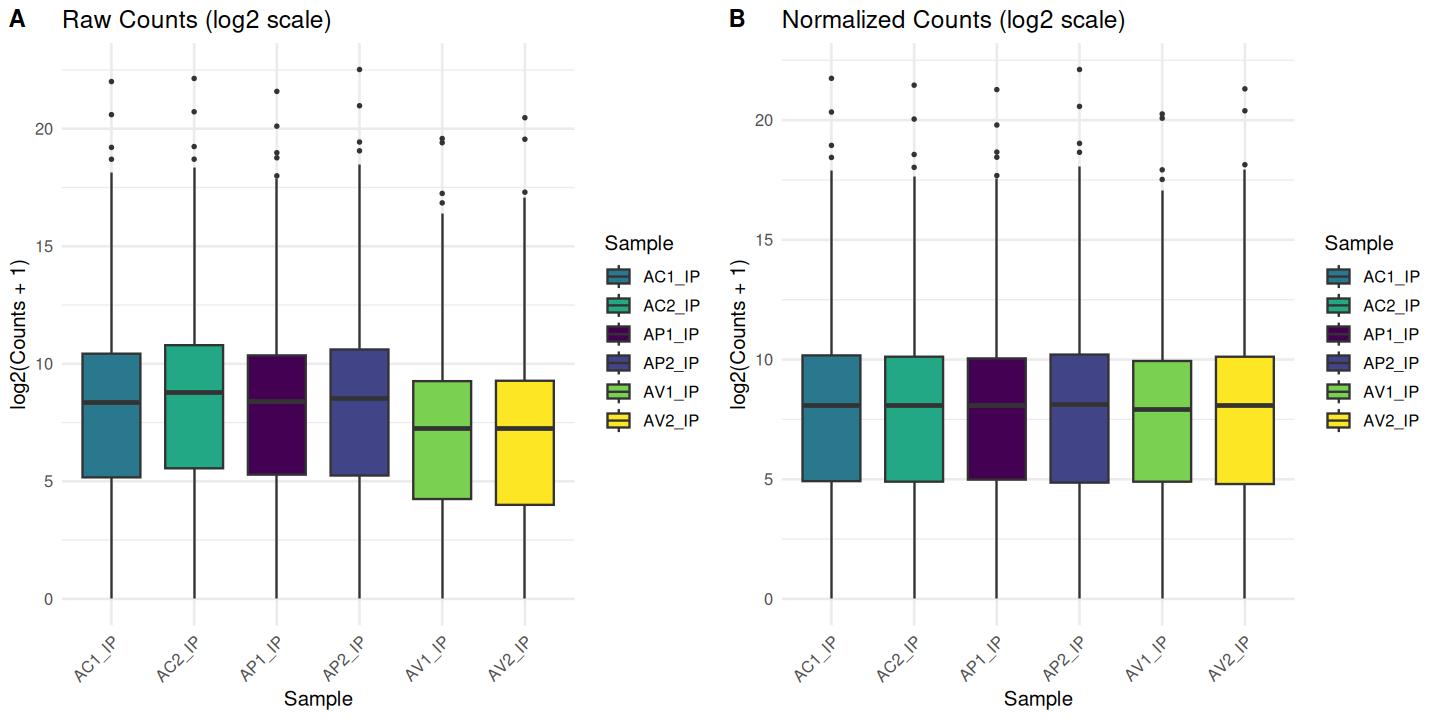

In [16]:
print("Boxplot of Raw vs log2 Normalized Counts")

# Prepare raw counts
raw_counts <- as.data.frame(counts(dds, normalized = FALSE))
raw_counts$Gene <- rownames(raw_counts)
raw_long <- pivot_longer(raw_counts, -Gene, names_to = "Sample", values_to = "Count")
raw_long$log2_count <- log2(raw_long$Count + 1)

# Prepare normalized counts
norm_counts <- as.data.frame(counts(dds, normalized = TRUE))
norm_counts$Gene <- rownames(norm_counts)
norm_long <- pivot_longer(norm_counts, -Gene, names_to = "Sample", values_to = "Count")
norm_long$log2_count <- log2(norm_long$Count + 1)

# Color palette
sample_list <- unique(c(raw_long$Sample, norm_long$Sample))
sample_colors <- setNames(viridis::viridis(length(sample_list), option = "D"), sample_list)

# Plot p1: Raw counts
p1 <- ggplot(raw_long, aes(x = Sample, y = log2_count, fill = Sample)) +
  geom_boxplot(outlier.size = 0.5, width = 0.7) +
  scale_fill_manual(values = sample_colors, name = "Sample") +
  theme_minimal(base_size = 12) +
  labs(title = "Raw Counts (log2 scale)",
       y = "log2(Counts + 1)", x = "Sample") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Plot p2: Normalized counts
p2 <- ggplot(norm_long, aes(x = Sample, y = log2_count, fill = Sample)) +
  geom_boxplot(outlier.size = 0.5, width = 0.7) +
  scale_fill_manual(values = sample_colors, name = "Sample") +
  theme_minimal(base_size = 12) +
  labs(title = "Normalized Counts (log2 scale)",
       y = "log2(Counts + 1)", x = "Sample") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# Combine side-by-side
options(repr.plot.width = 12, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2, align = 'h')

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


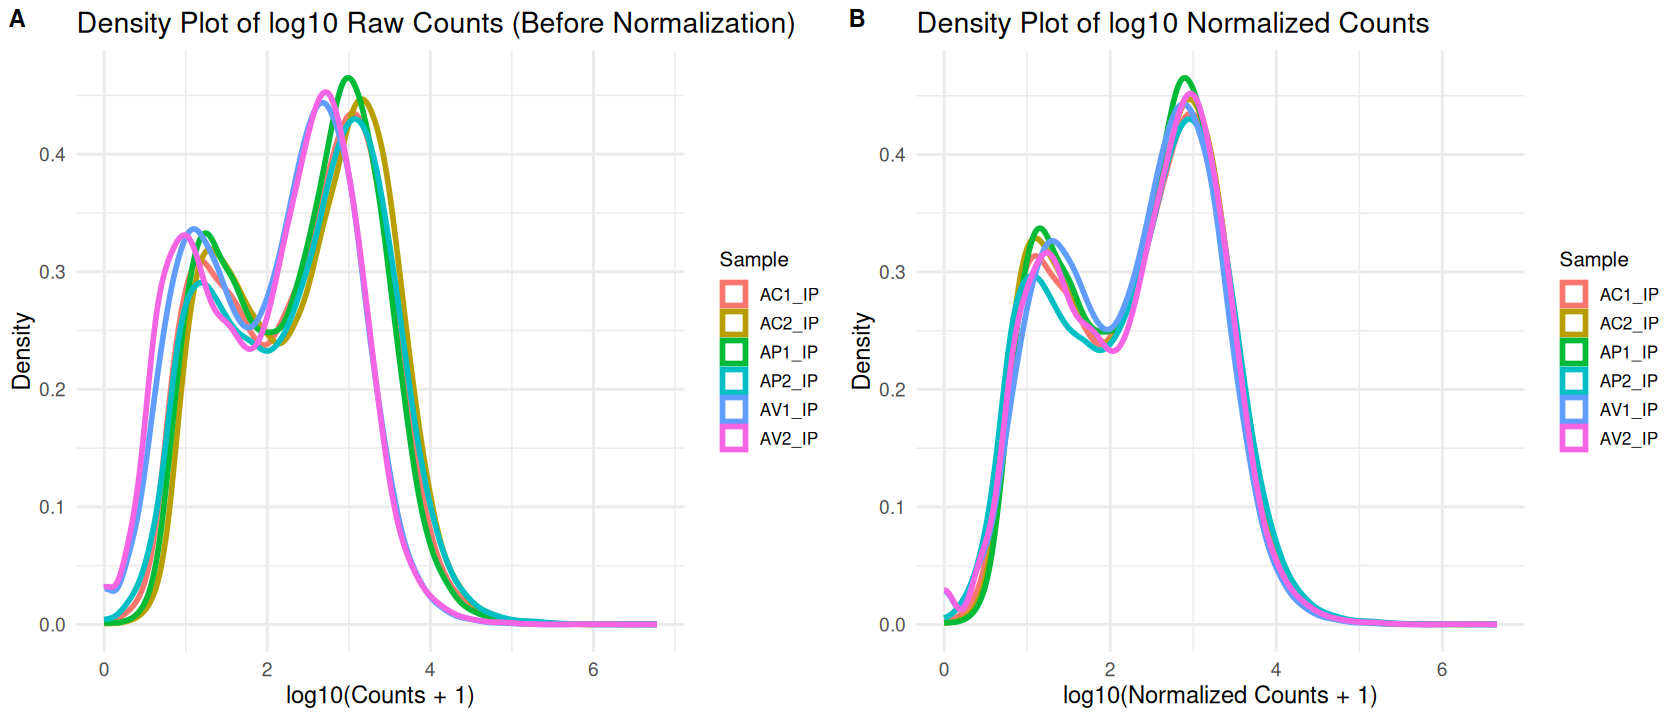

In [17]:
# Extract raw counts and log-transform
raw_counts <- counts(dds, normalized = FALSE)
raw_log_counts <- log10(raw_counts + 1)

# Convert to long format for ggplot2
log1_df <- as.data.frame(raw_log_counts)
log1_df$Gene <- rownames(log1_df)
log1_long <- pivot_longer(log1_df, -Gene, names_to = "Sample", values_to = "log10_count")

# Extract normalized counts and log-transform
norm_counts <- counts(dds, normalized = TRUE)
norm_log_counts <- log10(norm_counts + 1)

# Convert to long format for ggplot2
log2_df <- as.data.frame(norm_log_counts)
log2_df$Gene <- rownames(log2_df)
log2_long <- pivot_longer(log2_df, -Gene, names_to = "Sample", values_to = "log10_count")

# Plot with ggplot2
p1 = ggplot(log1_long, aes(x = log10_count, color = Sample)) +
  geom_density(size = 1.2, alpha = 0.8) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Density Plot of log10 Raw Counts (Before Normalization)",
    x = "log10(Counts + 1)",
    y = "Density"
  ) +
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    legend.position = "right"
  )
# Plot with ggplot2
p2 = ggplot(log2_long, aes(x = log10_count, color = Sample)) +
  geom_density(size = 1.2, alpha = 0.8) +
  theme_minimal(base_size = 14) +
  labs(
    title = "Density Plot of log10 Normalized Counts",
    x = "log10(Normalized Counts + 1)",
    y = "Density"
  ) +
  theme(
    legend.title = element_text(size = 12),
    legend.text = element_text(size = 10),
    legend.position = "right"
  )

# Combine side-by-side
options(repr.plot.width = 14, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2, align = 'h')

In [18]:
print("printing the results")
resultsNames(dds)

[1] "printing the results"


[1] "Intercept"          "condition_AC_vs_AV" "condition_AP_vs_AV"

In [19]:
print("No shrinkage")

# Get results for different comparisons
res_AP_vs_AC <- results(dds, contrast = c("condition", "AP", "AC"))
res_AP_vs_AV <- results(dds, contrast = c("condition", "AP", "AV"))
res_AC_vs_AV <- results(dds, contrast = c("condition", "AC", "AV"))

# summary(res_AP_vs_AC)
# summary(res_AC_vs_AV)
# summary(res_AP_vs_AV)

# Save results
write.csv(as.data.frame(res_AP_vs_AC), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AC_results.csv")
write.csv(as.data.frame(res_AP_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AV_results.csv")
write.csv(as.data.frame(res_AC_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AC_vs_AV_results.csv")

###########################################################
###########################################################

print("number of differentially bound transcripts : AP vs AC : pvalue < 0.05 and padj < 0.1")
dim(subset(res_AP_vs_AC, pvalue < 0.05))[1]
dim(subset(res_AP_vs_AC, padj < 0.1))[1]

print("number of differentially bound transcripts : AP vs AV : pvalue < 0.05 and padj < 0.1")
dim(subset(res_AP_vs_AV, pvalue < 0.05))[1]
dim(subset(res_AP_vs_AV, padj < 0.1))[1]

print("number of differentially bound transcripts : AC vs AV : pvalue < 0.05 and padj < 0.1")
dim(subset(res_AC_vs_AV, pvalue < 0.05))[1]
dim(subset(res_AC_vs_AV, padj < 0.1))[1]

###########################################################
###########################################################

[1] "No shrinkage"
[1] "number of differentially bound transcripts : AP vs AC : pvalue < 0.05 and padj < 0.1"


[1] 1374

[1] 378

[1] "number of differentially bound transcripts : AP vs AV : pvalue < 0.05 and padj < 0.1"


[1] 8474

[1] 8318

[1] "number of differentially bound transcripts : AC vs AV : pvalue < 0.05 and padj < 0.1"


[1] 8482

[1] 8320

In [20]:
# type = c("apeglm", "ashr", "normal")

In [21]:
print("Data shrinkage : normal lfcShrink")

[1] "Data shrinkage : normal lfcShrink"


In [22]:
# Get results for different comparisons

resLFCnormal_AP_vs_AV <- lfcShrink(dds, contrast = c("condition", "AP", "AV"), type="normal")
resLFCnormal_AC_vs_AV <- lfcShrink(dds, contrast = c("condition", "AC", "AV"), type="normal")
resLFCnormal_AP_vs_AC <- lfcShrink(dds, contrast = c("condition", "AP", "AC"), type="normal")

# summary(resLFCnormal_AP_vs_AC)
# summary(resLFCnormal_AC_vs_AV)
# summary(resLFCnormal_AP_vs_AV)

# Save results
write.csv(as.data.frame(resLFCnormal_AP_vs_AC), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AC_results.resLFCnormal.csv")
write.csv(as.data.frame(resLFCnormal_AP_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AV_results.resLFCnormal.csv")
write.csv(as.data.frame(resLFCnormal_AC_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AC_vs_AV_results.resLFCnormal.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCnormal: AP vs AC : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_AP_vs_AC, pvalue < 0.05))
dim(subset(resLFCnormal_AP_vs_AC, padj < 0.1))

print("number of differentially bound and expressed transcripts : resLFCnormal : AP vs AV : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_AP_vs_AV, pvalue < 0.05))
dim(subset(resLFCnormal_AP_vs_AV, padj < 0.1))

print("number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 and padj < 0.1")
dim(subset(resLFCnormal_AC_vs_AV, pvalue < 0.05))
dim(subset(resLFCnormal_AC_vs_AV, padj < 0.1))

###########################################################
###########################################################

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895

using 'normal' for LFC shrinkage, the Normal prior from Love et al (2014).

Note that type='apeglm' and type='ashr' have shown to have less bias than type='normal'.
See ?lfcShrink for more details on shrinkage type, and the DESeq2 vignette.
Reference: https://doi.org/10.1093/bioinformatics/bty895



[1] "number of differentially bound and expressed transcripts : resLFCnormal: AP vs AC : pvalue < 0.05 and padj < 0.1"


[1] 1374    6

[1] 378   6

[1] "number of differentially bound and expressed transcripts : resLFCnormal : AP vs AV : pvalue < 0.05 and padj < 0.1"


[1] 8474    6

[1] 8318    6

[1] "number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 and padj < 0.1"


[1] 8482    6

[1] 8320    6

In [23]:
print("Data shrinkage : ashr lfcShrink")

[1] "Data shrinkage : ashr lfcShrink"


In [24]:
# If you must use contrast, you should use type="normal" or type="ashr" instead of apeglm, 
# because apeglm only works with coef.  
# Apeglm is the recommended method for log-fold change shrinkage.

# Get results for different comparisons
# resLFCapeglm_AP_vs_AV <- lfcShrink(dds, coef = "condition_AP_vs_AV", type="apeglm")
# resLFCapeglm_AC_vs_AV <- lfcShrink(dds, coef = "condition_AC_vs_AV", type="apeglm")

resLFCashr_AP_vs_AV <- lfcShrink(dds, contrast = c("condition", "AP", "AV"), type="ashr")
resLFCashr_AC_vs_AV <- lfcShrink(dds, contrast = c("condition", "AC", "AV"), type="ashr")
resLFCashr_AP_vs_AC <- lfcShrink(dds, contrast = c("condition", "AP", "AC"), type="ashr")

# summary(resLFCashr_AP_vs_AC)
# summary(resLFCashr_AC_vs_AV)
# summary(resLFCashr_AP_vs_AV)

# Save results
write.csv(as.data.frame(resLFCashr_AP_vs_AC), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AC_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_AP_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AV_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_AC_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AC_vs_AV_results.resLFCashr.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCashr : AP vs AC : pvalue < 0.05 or padj < 0.1")
dim(subset(resLFCashr_AP_vs_AC, pvalue < 0.05))[1]
dim(subset(resLFCashr_AP_vs_AC, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : AP vs AV : pvalue < 0.05 or padj < 0.1")
dim(subset(resLFCashr_AP_vs_AV, pvalue < 0.05))[1]
dim(subset(resLFCashr_AP_vs_AV, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 or padj < 0.1")
dim(subset(resLFCashr_AC_vs_AV, pvalue < 0.05))[1]
dim(subset(resLFCashr_AC_vs_AV, padj < 0.1))[1]

###########################################################
###########################################################

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



[1] "number of differentially bound and expressed transcripts : resLFCashr : AP vs AC : pvalue < 0.05 or padj < 0.1"


[1] 1374

[1] 378

[1] "number of differentially bound and expressed transcripts : resLFCashr : AP vs AV : pvalue < 0.05 or padj < 0.1"


[1] 8474

[1] 8318

[1] "number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 or padj < 0.1"


[1] 8482

[1] 8320

In [25]:
# If you must use contrast, you should use type="normal" or type="ashr" instead of apeglm, 
# because apeglm only works with coef.  
# Apeglm is the recommended method for log-fold change shrinkage.

# Get results for different comparisons
# resLFCapeglm_AP_vs_AV <- lfcShrink(dds, coef = "condition_AP_vs_AV", type="apeglm")
# resLFCapeglm_AC_vs_AV <- lfcShrink(dds, coef = "condition_AC_vs_AV", type="apeglm")

resLFCashr_AP_vs_AV <- lfcShrink(dds, contrast = c("condition", "AP", "AV"), type="ashr")
resLFCashr_AC_vs_AV <- lfcShrink(dds, contrast = c("condition", "AC", "AV"), type="ashr")
resLFCashr_AP_vs_AC <- lfcShrink(dds, contrast = c("condition", "AP", "AC"), type="ashr")

# summary(resLFCashr_AP_vs_AC)
# summary(resLFCashr_AC_vs_AV)
# summary(resLFCashr_AP_vs_AV)

# Save results
write.csv(as.data.frame(resLFCashr_AP_vs_AC), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AC_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_AP_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AV_results.resLFCashr.csv")
write.csv(as.data.frame(resLFCashr_AC_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AC_vs_AV_results.resLFCashr.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : resLFCashr : AP vs AC : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_AP_vs_AC, pvalue < 0.05))[1]
dim(subset(resLFCashr_AP_vs_AC, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : AP vs AV : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_AP_vs_AV, pvalue < 0.05))[1]
dim(subset(resLFCashr_AP_vs_AV, padj < 0.1))[1]

print("number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 and padj < 1")
dim(subset(resLFCashr_AC_vs_AV, pvalue < 0.05))[1]
dim(subset(resLFCashr_AC_vs_AV, padj < 0.1))[1]

###########################################################
###########################################################

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



[1] "number of differentially bound and expressed transcripts : resLFCashr : AP vs AC : pvalue < 0.05 and padj < 1"


[1] 1374

[1] 378

[1] "number of differentially bound and expressed transcripts : resLFCashr : AP vs AV : pvalue < 0.05 and padj < 1"


[1] 8474

[1] 8318

[1] "number of differentially bound and expressed transcripts : resLFCashr : AC vs AV : pvalue < 0.05 and padj < 1"


[1] 8482

[1] 8320

[1] "Comparing the number of DE genes for the comparison : AP vs AC for a pvalue < 0.05"
[1] "Comparing the number of DE genes for the comparison : AP vs AC for a pvalue < 0.05"


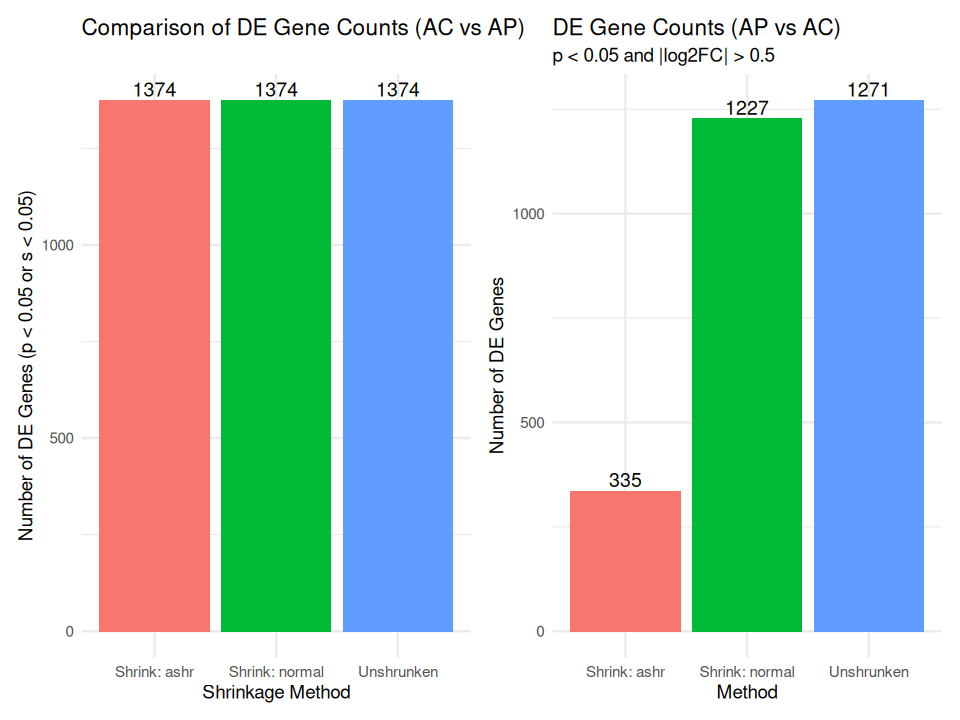

In [26]:
print("Comparing the number of DE genes for the comparison : AP vs AC for a pvalue < 0.05")

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

# The information about DE peaks was stored in :
# res_AP_vs_AC 
# res_AP_vs_AV 
# res_AC_vs_AV 

# resLFCnormal_AP_vs_AV
# resLFCnormal_AC_vs_AV 
# resLFCnormal_AP_vs_AC 

# resLFCashr_AP_vs_AV 
# resLFCashr_AC_vs_AV 
# resLFCashr_AP_vs_AC 

# Count DEGs
n_DE_unshrunken <- sum(res_AP_vs_AC$pvalue < 0.05, na.rm = TRUE)
n_DE_shrink_normal <- sum(resLFCnormal_AP_vs_AC$pvalue < 0.05, na.rm = TRUE)  # Same p-values as unshrunken
n_DE_ashr <- sum( resLFCashr_AP_vs_AC$pvalue < 0.05, na.rm = TRUE)            # Same p-values as unshrunken

# Build a data frame
compare_df1 <- data.frame(
  Method = c("Unshrunken", "Shrink: normal", "Shrink: ashr"),
  DE_Genes = c(n_DE_unshrunken, n_DE_shrink_normal, n_DE_ashr)
)

# Plot it
p1 = ggplot(compare_df1, aes(x = Method, y = DE_Genes, fill = Method)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "Comparison of DE Gene Counts (AC vs AP)",
    y = "Number of DE Genes (p < 0.05 or s < 0.05)",
    x = "Shrinkage Method"
  ) +
  theme(legend.position = "none") +
  geom_text(aes(label = DE_Genes), vjust = -0.3, size = 4)

print("Comparing the number of DE genes for the comparison : AP vs AC for a pvalue < 0.05")

# Shrinkage Methods: The lfcShrink() function in DESeq2 is used to obtain more accurate estimates of log2 fold changes, 
# especially for genes with low counts or high variability.
# Threshold Selection: The choice of a log2FC threshold (e.g., 0.3) is somewhat arbitrary and should be based on the biological context 
# and the desired stringency of the analysis.
# Interpretation: Comparing the number of DE genes across different shrinkage methods can provide insights into the robustness of your findings. 
# It's common to observe variations in the number of DE genes identified, depending on the method used.

# Raw (non-shrunk)
n_raw <- sum(res_AP_vs_AC$pvalue < pval_cutoff & abs(res_AP_vs_AC$log2FoldChange) > lfc_cutoff, na.rm = TRUE)
# Normal shrink
n_normal <- sum(res_AP_vs_AC$pvalue < pval_cutoff & abs(resLFCnormal_AP_vs_AC$log2FoldChange) > lfc_cutoff, na.rm = TRUE)
# Ashr shrink (using s-value instead of p-value)
n_ashr <- sum(resLFCashr_AP_vs_AC$pvalue < pval_cutoff & abs(resLFCashr_AP_vs_AC$log2FoldChange) > lfc_cutoff, na.rm = TRUE)

# Combine into a data frame
compare_df2 <- data.frame(
  Method = c("Unshrunken", "Shrink: normal", "Shrink: ashr"),
  DE_Genes = c(n_raw, n_normal, n_ashr)
)

p2 = ggplot(compare_df2, aes(x = Method, y = DE_Genes, fill = Method)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(
    title = "DE Gene Counts (AP vs AC)",
    subtitle = "p < 0.05 and |log2FC| > 0.5",
    y = "Number of DE Genes",
    x = "Method"
  ) +
  geom_text(aes(label = DE_Genes), vjust = -0.3, size = 4) +
  theme(legend.position = "none")


# Print the plot in Jupyter
options(repr.plot.width = 8, repr.plot.height = 6)
p1 + p2

In [27]:
print("MA plots:")

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

[1] "MA plots:"


In [28]:
make_MA_plot <- function(res_df, title = "MA Plot", lfc_cutoff = 0.3, pval_cutoff = 0.1, ylim = c(-2, 2)) {
  
  res_df <- as.data.frame(res_df)
  
  # Replace NA p-values with the threshold so they are not considered significant
  res_df$pvalue[is.na(res_df$pvalue)] <- 1
  
  # Label significance based on thresholds
  res_df$sig <- ifelse(res_df$pvalue < pval_cutoff & abs(res_df$log2FoldChange) > lfc_cutoff,
                       "Significant", "Not Significant")

  # Generate the MA plot
  ggplot(res_df, aes(x = baseMean, y = log2FoldChange, color = sig)) +
    geom_point(alpha = 0.6, size = 1) +
    scale_x_log10() +
    scale_color_manual(values = c("Significant" = "#D7263D", "Not Significant" = "gray70")) +
    geom_hline(yintercept = c(-lfc_cutoff, lfc_cutoff), linetype = "dashed", color = "black") +
    coord_cartesian(ylim = ylim) +
    theme_minimal(base_size = 14) +
    labs(
      title = title,
      x = "Mean Expression (log10 scale)",
      y = "log2 Fold Change",
      color = "Significance"
    ) +
    theme(
      legend.position = "right",
      panel.grid.minor = element_blank()
    )
}


[1] "MA plots:"
[1] "AP vs AC"


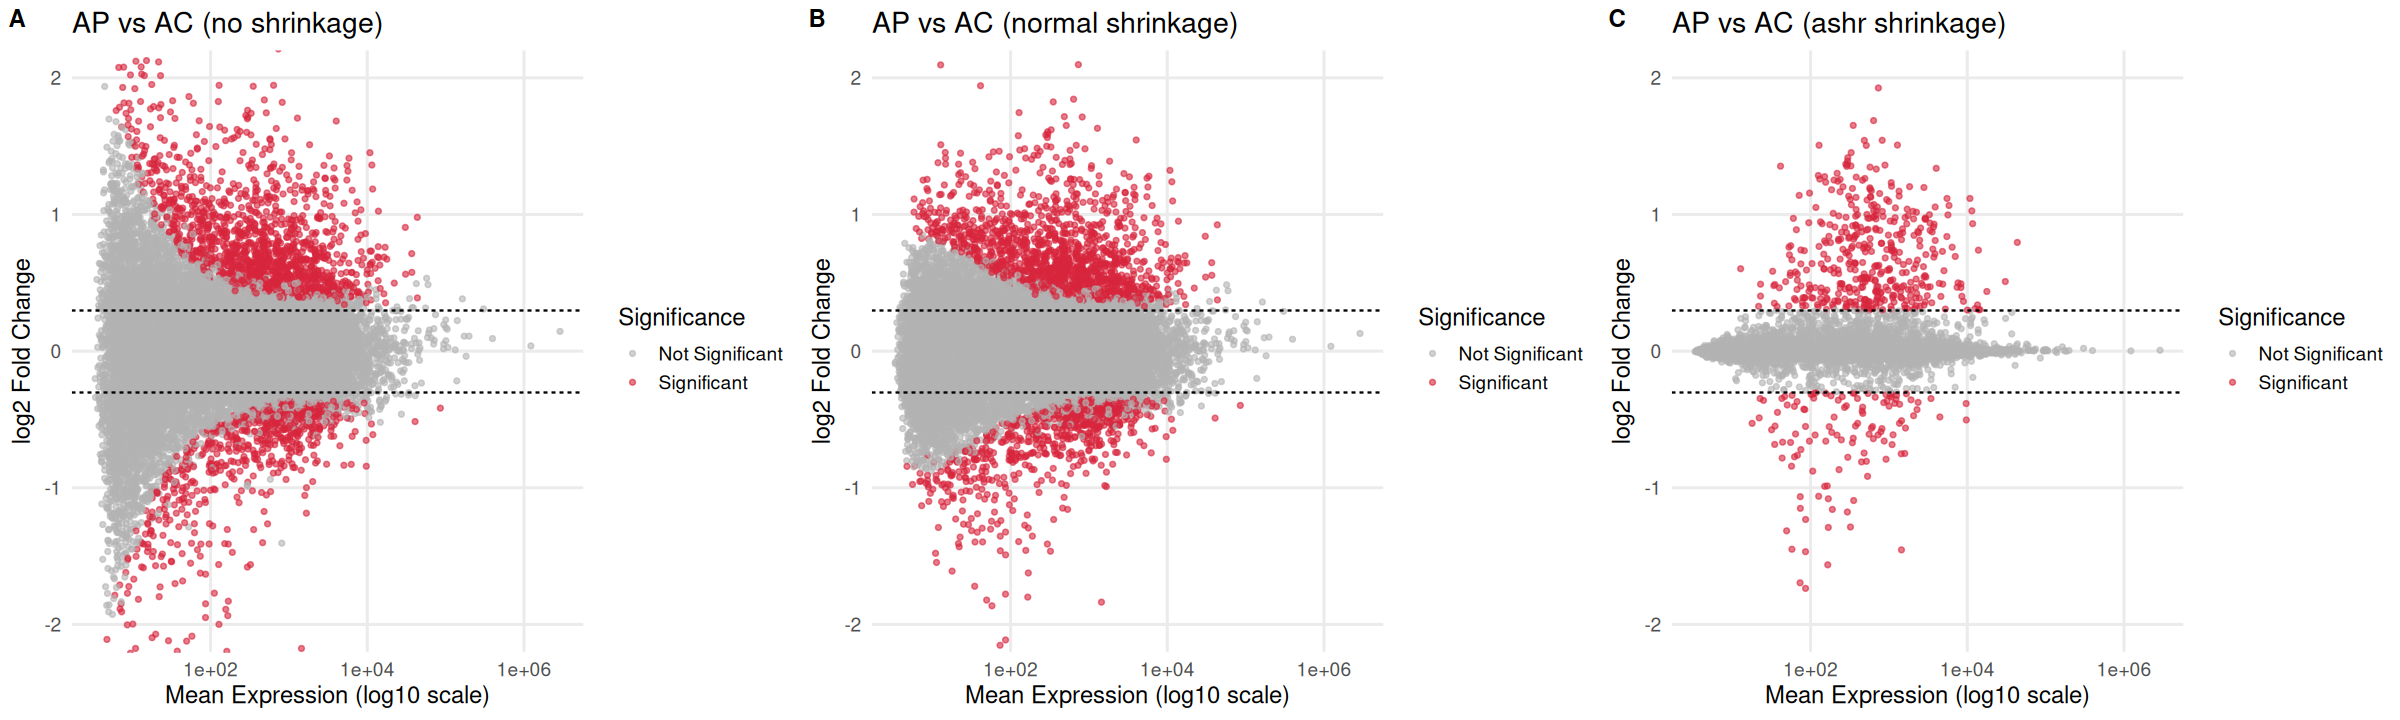

In [29]:
print("MA plots:")
print("AP vs AC")

# Create the plots
p1 <- make_MA_plot(res_AP_vs_AC, title = "AP vs AC (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_AP_vs_AC, title = "AP vs AC (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_AP_vs_AC, title = "AP vs AC (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 20, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "MA plots:"
[1] "AC vs AV"


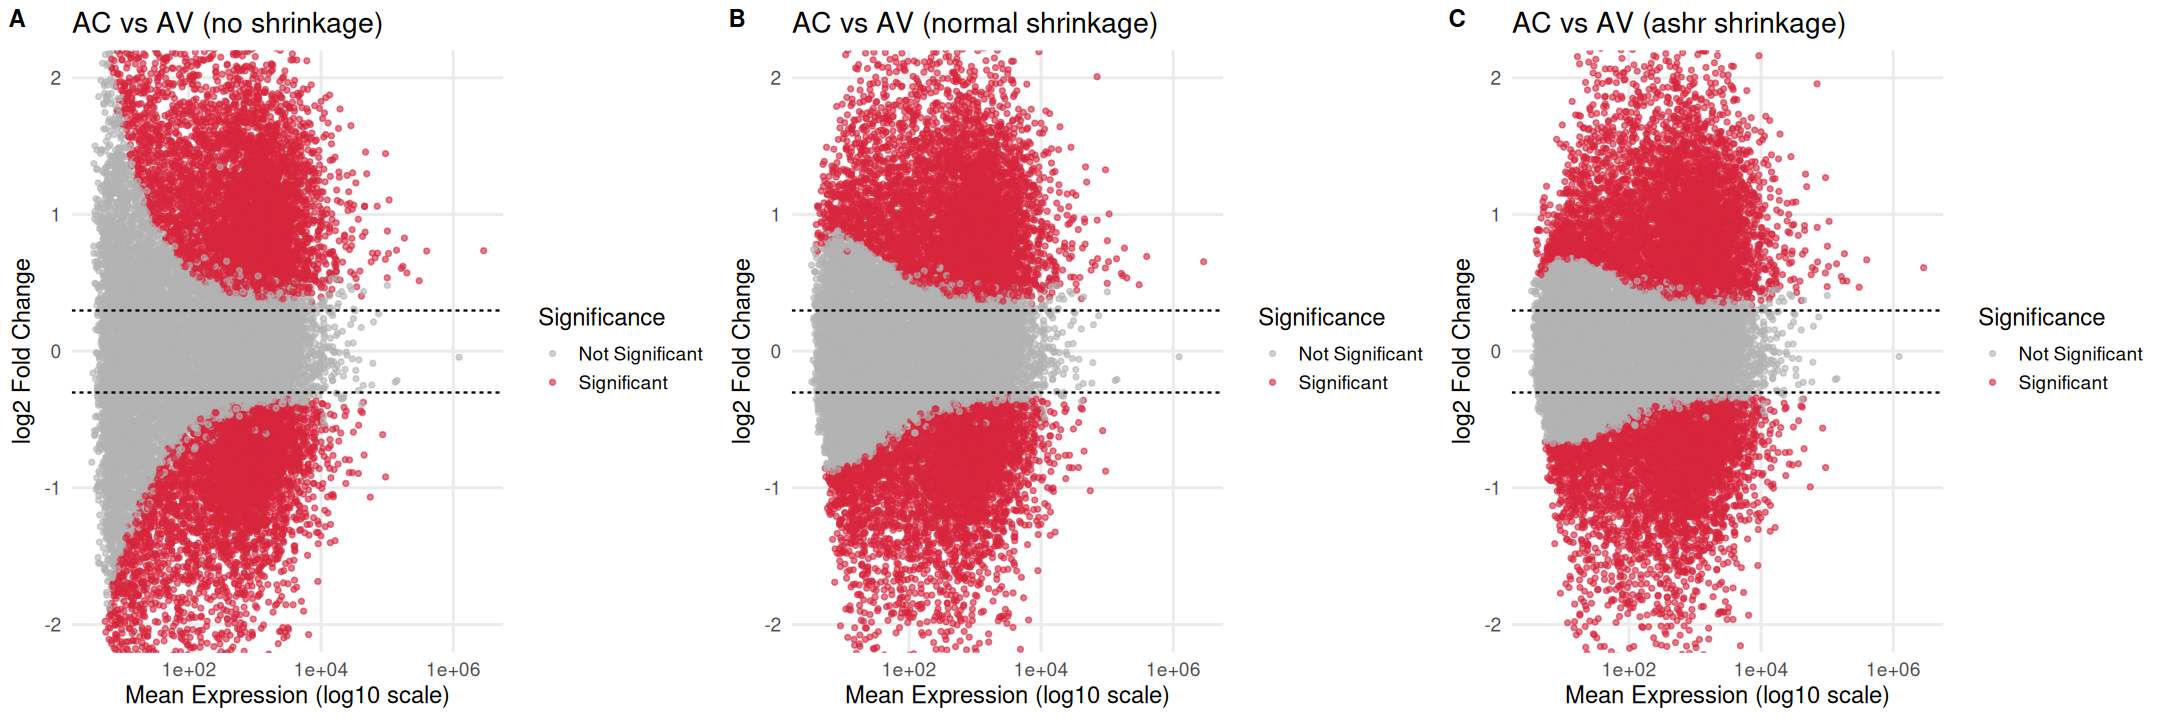

In [30]:
print("MA plots:")
print("AC vs AV")

# Create the plots
p1 <- make_MA_plot(res_AC_vs_AV, title = "AC vs AV (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_AC_vs_AV, title = "AC vs AV (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_AC_vs_AV, title = "AC vs AV (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 18, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "MA plots:"
[1] "AP vs AV"


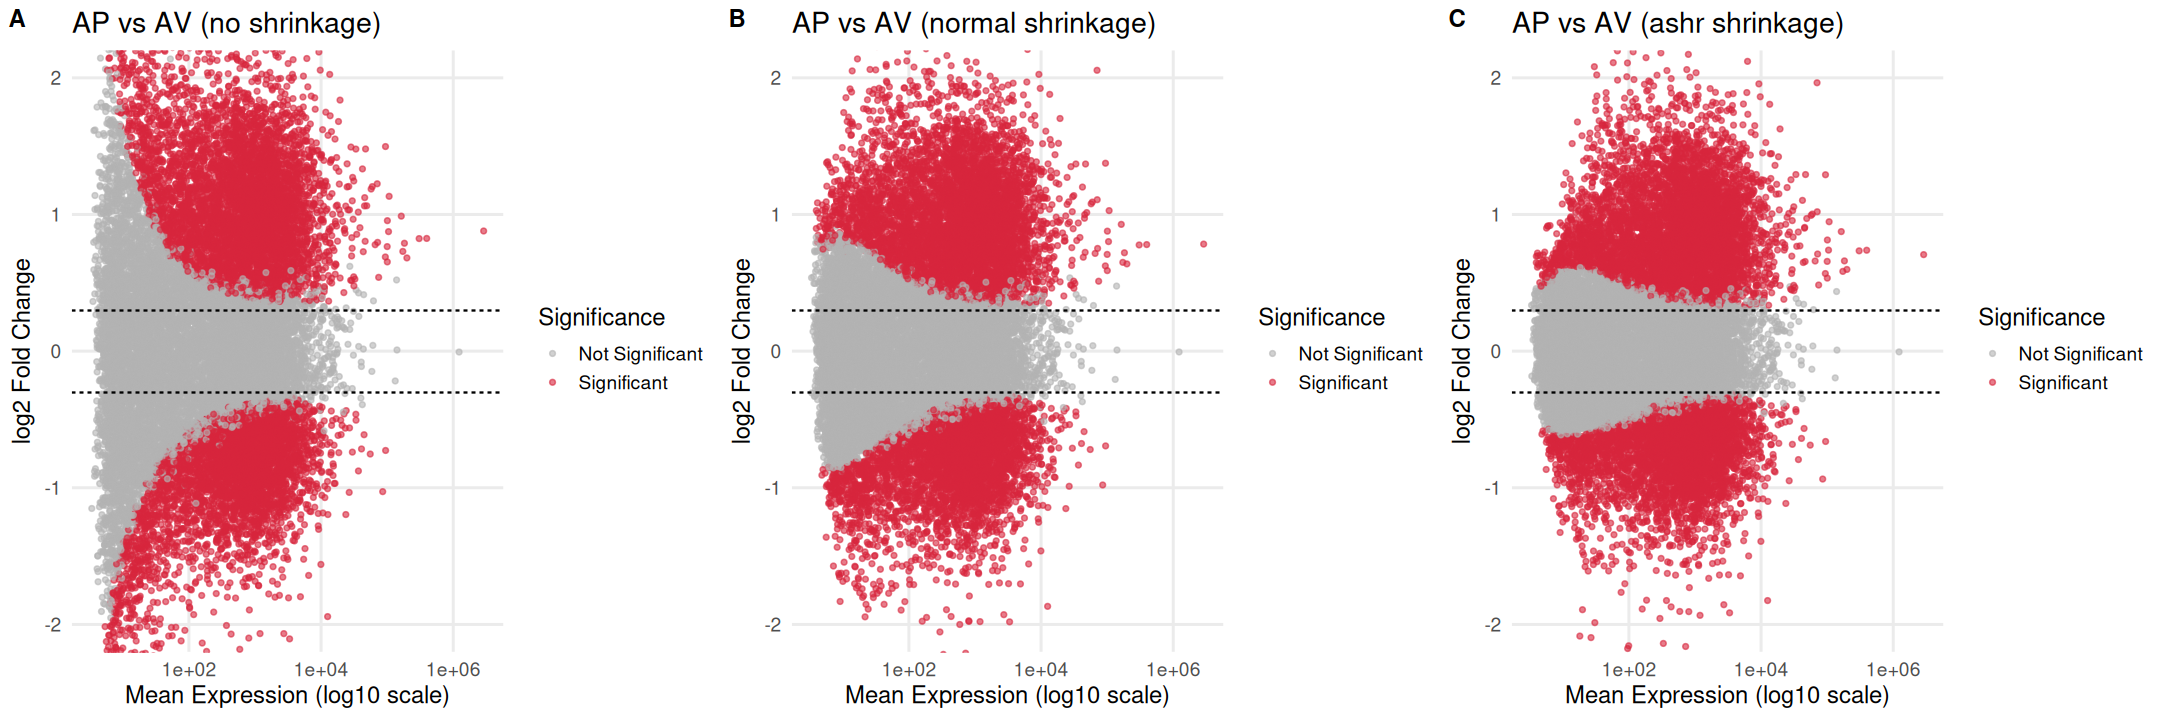

In [31]:
print("MA plots:")
print("AP vs AV")

# Create the plots
p1 <- make_MA_plot(res_AP_vs_AV, title = "AP vs AV (no shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p2 <- make_MA_plot(resLFCnormal_AP_vs_AV, title = "AP vs AV (normal shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)
p3 <- make_MA_plot(resLFCashr_AP_vs_AV, title = "AP vs AV (ashr shrinkage)", lfc_cutoff = 0.3, pval_cutoff = 0.1)

# Combine side-by-side
options(repr.plot.width = 18, repr.plot.height = 6)

# Combine side-by-side
plot_grid(p1, p2, p3, labels = c("A", "B", "C"), ncol = 3, align = 'h')

[1] "plotting dispersion"


function (q) 
coefs[1] + coefs[2]/q
<bytecode: 0x5a4f210a4880>
<environment: 0x5a4f210a10a8>
attr(,"coefficients")
asymptDisp  extraPois 
0.03280797 2.78635015 
attr(,"fitType")
[1] "parametric"
attr(,"varLogDispEsts")
[1] 1.376603
attr(,"dispPriorVar")
[1] 0.3443443

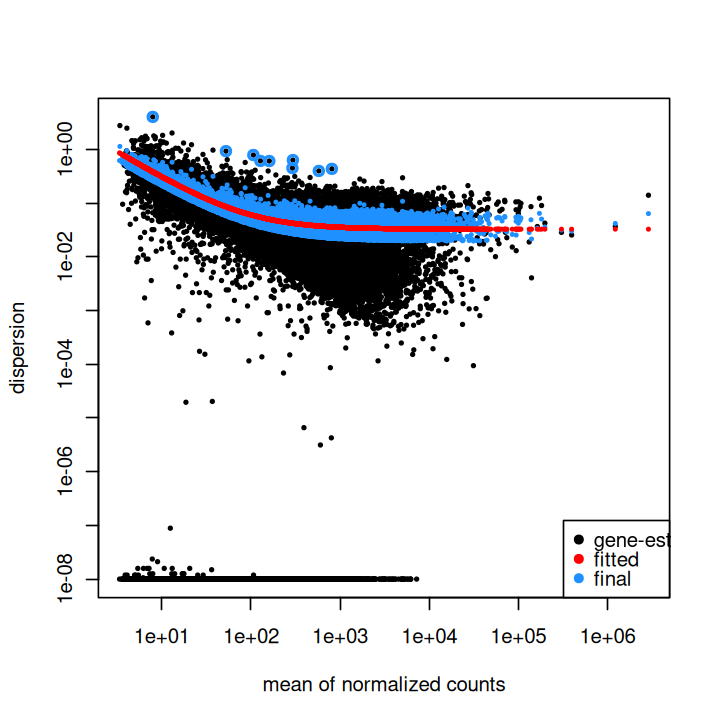

In [32]:
print("plotting dispersion")

# Combine side-by-side
options(repr.plot.width = 6, repr.plot.height = 6)

plotDispEsts(dds)
dispersionFunction(dds)

In [33]:
print("RLD and VST transformations")

# Effects of transformations on the variance
rld <- rlog(dds, blind = FALSE)  
vsd <- vst(dds, blind = FALSE) 
ntd <- normTransform(dds)
# meanSdPlot(assay(ntd))
# meanSdPlot(assay(rld))
# meanSdPlot(assay(vsd))

[1] "RLD and VST transformations"


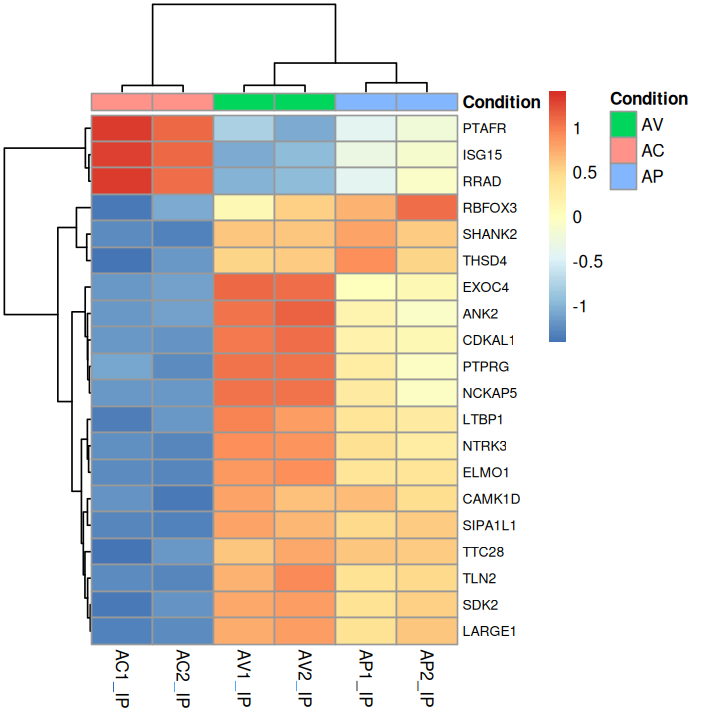

In [34]:
library("pheatmap")

# Select the top 20 differentially expressed genes based on adjusted p-value
top_genes <- rownames(res_AP_vs_AC)[order(res_AP_vs_AC$padj, na.last=NA)][1:20]  #

# Extract normalized transformed counts for the top genes
top_counts <- assay(vsd)[top_genes, ]

# Create annotation dataframe
df <- as.data.frame(colData(dds)["condition"])  # Ensure it is a proper dataframe
colnames(df) <- "Condition"  # Rename column for clarity

# Generate heatmap
options(repr.plot.width = 6, repr.plot.height = 6)
pheatmap(top_counts, 
         cluster_rows=TRUE,  # Cluster rows to group similar genes
         show_rownames=TRUE,  # Show gene names
         cluster_cols=TRUE,  # Cluster samples
         annotation_col=df,  # Add sample condition annotations
         scale="row",  # Normalize each gene's expression across samples
         fontsize_row=8)  # Adjust row text size for readability

In [35]:
print("PCA and MDS plots of rlog- and vst-transformed counts")

[1] "PCA and MDS plots of rlog- and vst-transformed counts"


using ntop=500 top features by variance

using ntop=500 top features by variance



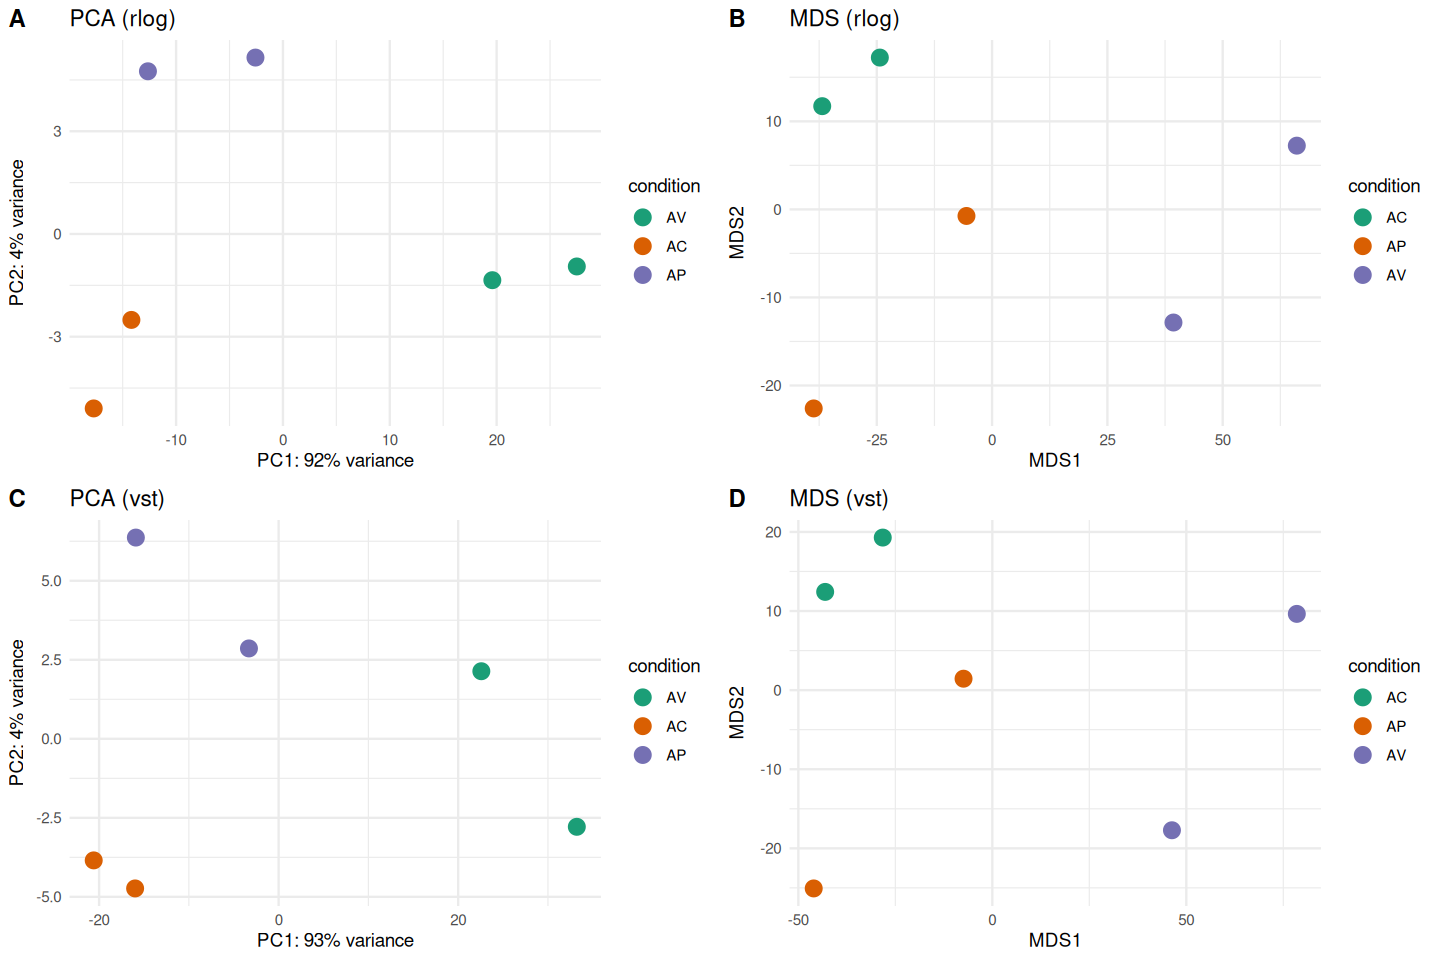

In [36]:

# 1. rlog transformation and PCA
rld <- rlog(dds, blind = FALSE)
pca_rld <- plotPCA(rld, intgroup = "condition", returnData = TRUE)
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

pca_rld_plot <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  xlab(paste0("PC1: ", percentVar_rld[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar_rld[2], "% variance")) +
  ggtitle("PCA (rlog)") +
  theme_minimal()

# 2. rlog MDS
dists_rld <- dist(t(assay(rld)))
mds_rld <- cmdscale(as.matrix(dists_rld))
mds_rld_df <- data.frame(MDS1 = mds_rld[,1], MDS2 = mds_rld[,2], condition = col_data$condition)

mds_rld_plot <- ggplot(mds_rld_df, aes(MDS1, MDS2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("MDS (rlog)") +
  theme_minimal()

# 3. vst transformation and PCA
vsd <- vst(dds, blind = FALSE)
pca_vsd <- plotPCA(vsd, intgroup = "condition", returnData = TRUE)
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))

pca_vsd_plot <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  xlab(paste0("PC1: ", percentVar_vsd[1], "% variance")) +
  ylab(paste0("PC2: ", percentVar_vsd[2], "% variance")) +
  ggtitle("PCA (vst)") +
  theme_minimal()

# 4. vst MDS
dists_vsd <- dist(t(assay(vsd)))
mds_vsd <- cmdscale(as.matrix(dists_vsd))
mds_vsd_df <- data.frame(MDS1 = mds_vsd[,1], MDS2 = mds_vsd[,2], condition = col_data$condition)

mds_vsd_plot <- ggplot(mds_vsd_df, aes(MDS1, MDS2, color = condition)) +
  geom_point(size = 4) +
  scale_color_brewer(palette = "Dark2") +
  ggtitle("MDS (vst)") +
  theme_minimal()

# Combine side-by-side
options(repr.plot.width = 12, repr.plot.height = 8)
# Combine all plots in a 2x2 grid
plot_grid(
  pca_rld_plot, mds_rld_plot,
  pca_vsd_plot, mds_vsd_plot,
  labels = c("A", "B", "C", "D"),
  ncol = 2, align = "hv"
)


Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine


The following object is masked from 'package:Biobase':

    combine


The following object is masked from 'package:BiocGenerics':

    combine




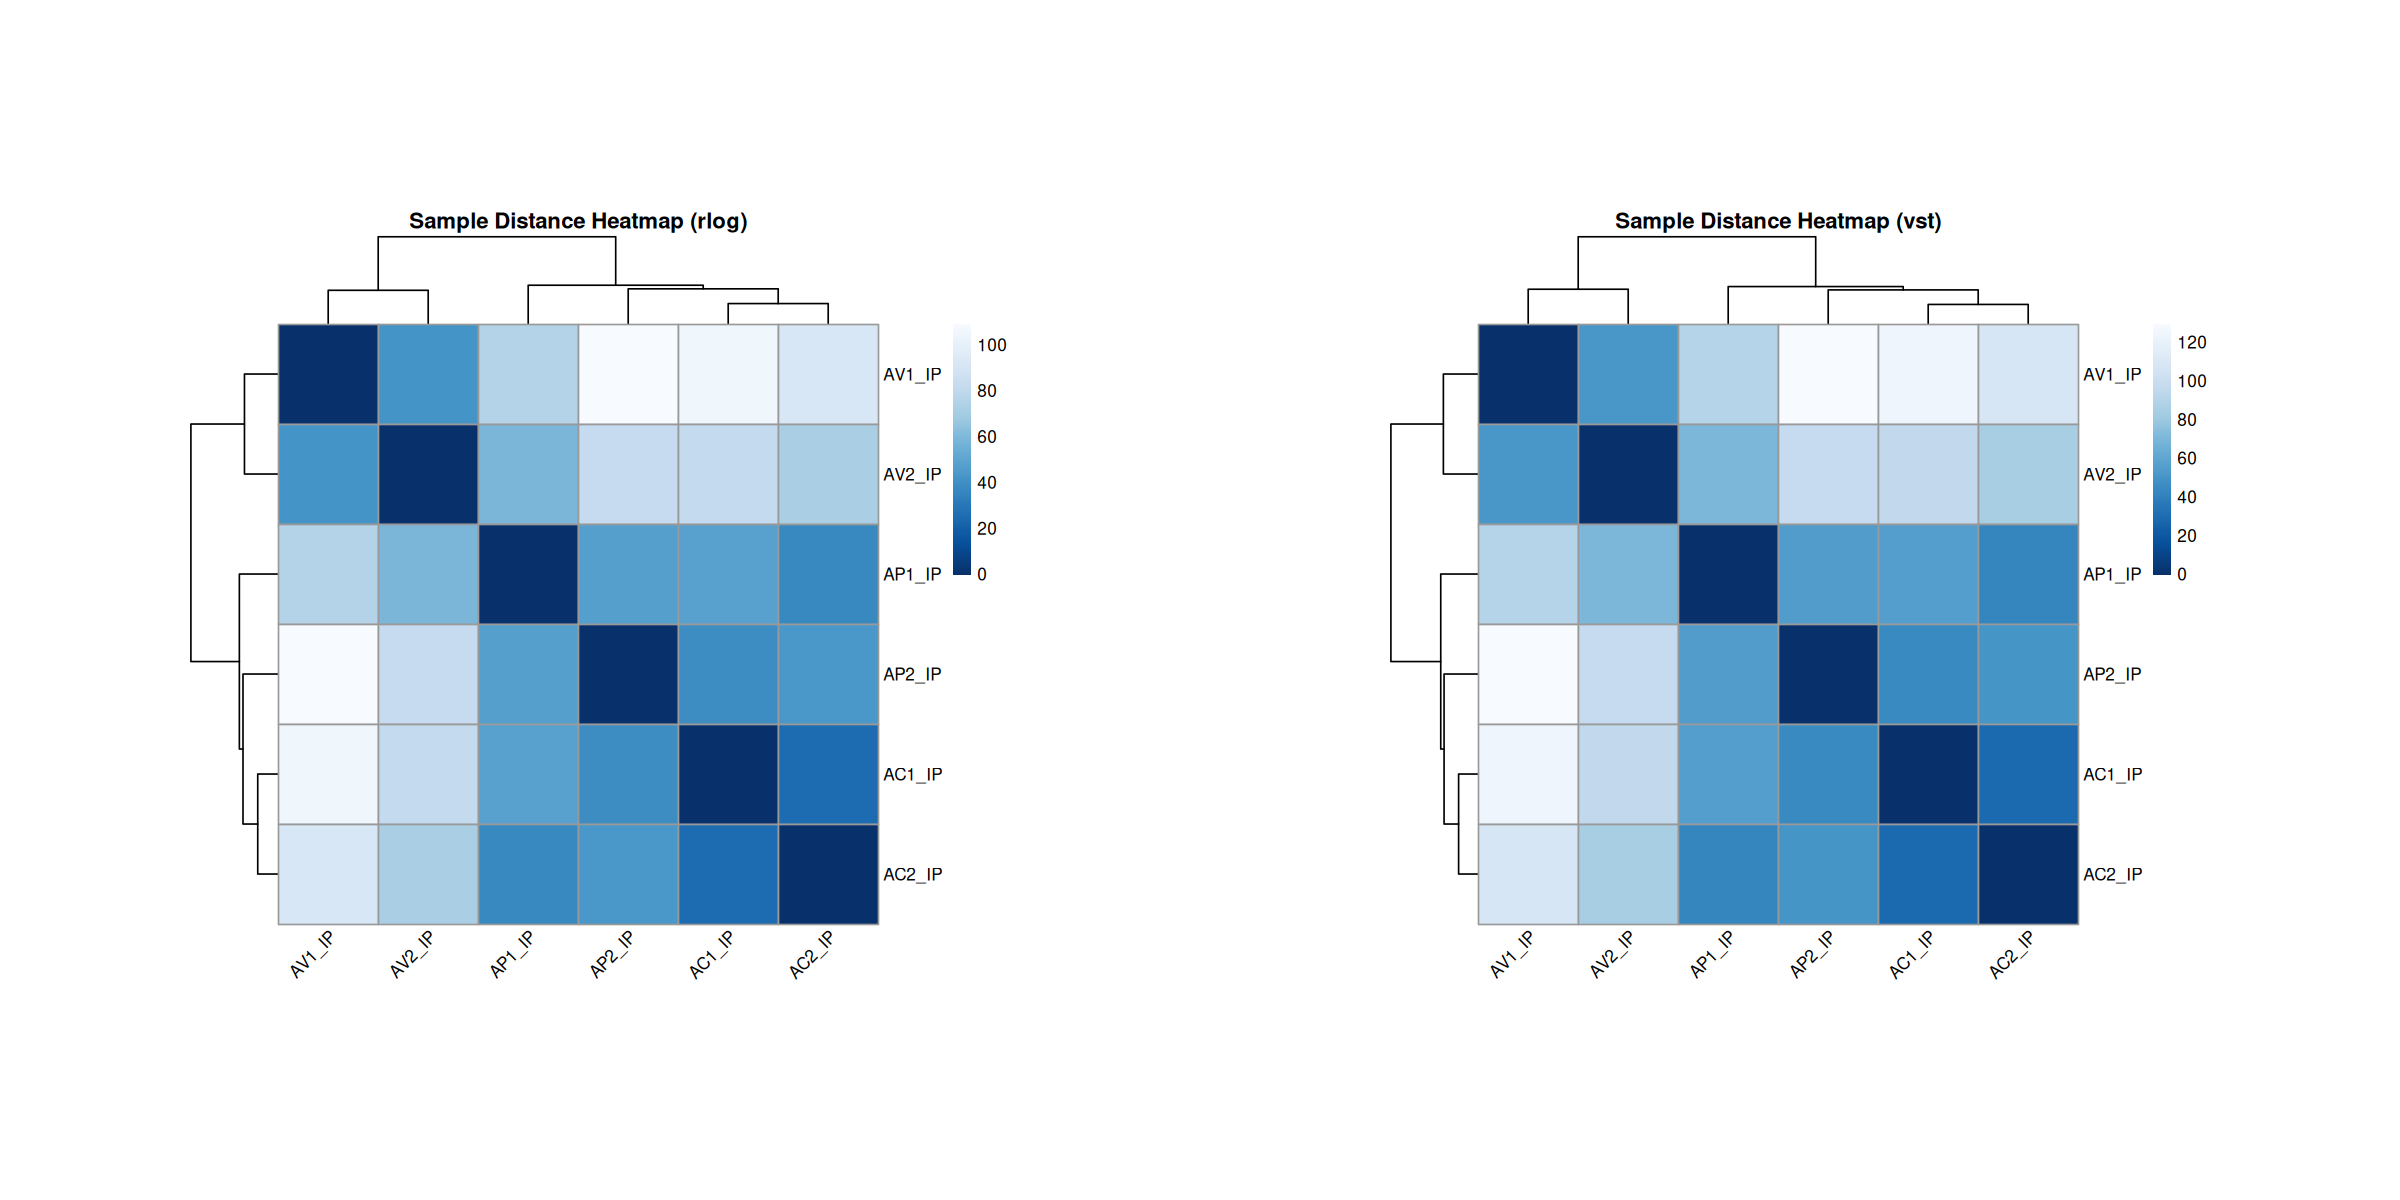

In [37]:
library(pheatmap)
library(RColorBrewer)
library(gridExtra)
library(grid)

# === RLOG Heatmap ===
rlog_matrix <- assay(rld)
sampleDists_rlog <- dist(t(rlog_matrix))
sampleDistMatrix_rlog <- as.matrix(sampleDists_rlog)
colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)

p1 <- pheatmap(sampleDistMatrix_rlog,
               clustering_distance_rows = sampleDists_rlog,
               clustering_distance_cols = sampleDists_rlog,
               col = colors,
               fontsize_row = 10,
               fontsize_col = 10,
               cellwidth = 60,
               cellheight = 60,
               angle_col = 45,
               main = "Sample Distance Heatmap (rlog)",
               silent = TRUE)

# === VST Heatmap ===
vsd_matrix <- assay(vsd)
sampleDists_vsd <- dist(t(vsd_matrix))
sampleDistMatrix_vsd <- as.matrix(sampleDists_vsd)

p2 <- pheatmap(sampleDistMatrix_vsd,
               clustering_distance_rows = sampleDists_vsd,
               clustering_distance_cols = sampleDists_vsd,
               col = colors,
               fontsize_row = 10,
               fontsize_col = 10,
               cellwidth = 60,
               cellheight = 60,
               angle_col = 45,
               main = "Sample Distance Heatmap (vst)",
               silent = TRUE)

# === Combine with spacing and ensure layout fits ===
grid.newpage()  # Ensures fresh drawing surface

# Combine side-by-side
options(repr.plot.width = 20, repr.plot.height = 10)

# === Convert pheatmap outputs to grobs ===
grob1 <- p1[[4]]
grob2 <- p2[[4]]

# === Combine with cowplot ===
cowplot::plot_grid(grob1, grob2, ncol = 2, rel_widths = c(1, 1))

In [38]:
print("Methods to use : GLM-PCA for PCA and PoissonDistance to calculate the sample distances")
# Another option for calculating sample distances is to use the Poisson Distance (Witten 2011), implemented in the PoiClaClu package.
# This measure of dissimilarity between counts also takes the inherent variance structure of counts into consideration when calculating
# the distances between samples. The PoissonDistance function takes the original count matrix (not normalized) with samples as rows
# instead of columns, so we need to transpose the counts in dds.

[1] "Methods to use : GLM-PCA for PCA and PoissonDistance to calculate the sample distances"


[1] "PCA by using GLMPCA library. RLOG and VSD transformations are more suitable than scale()."


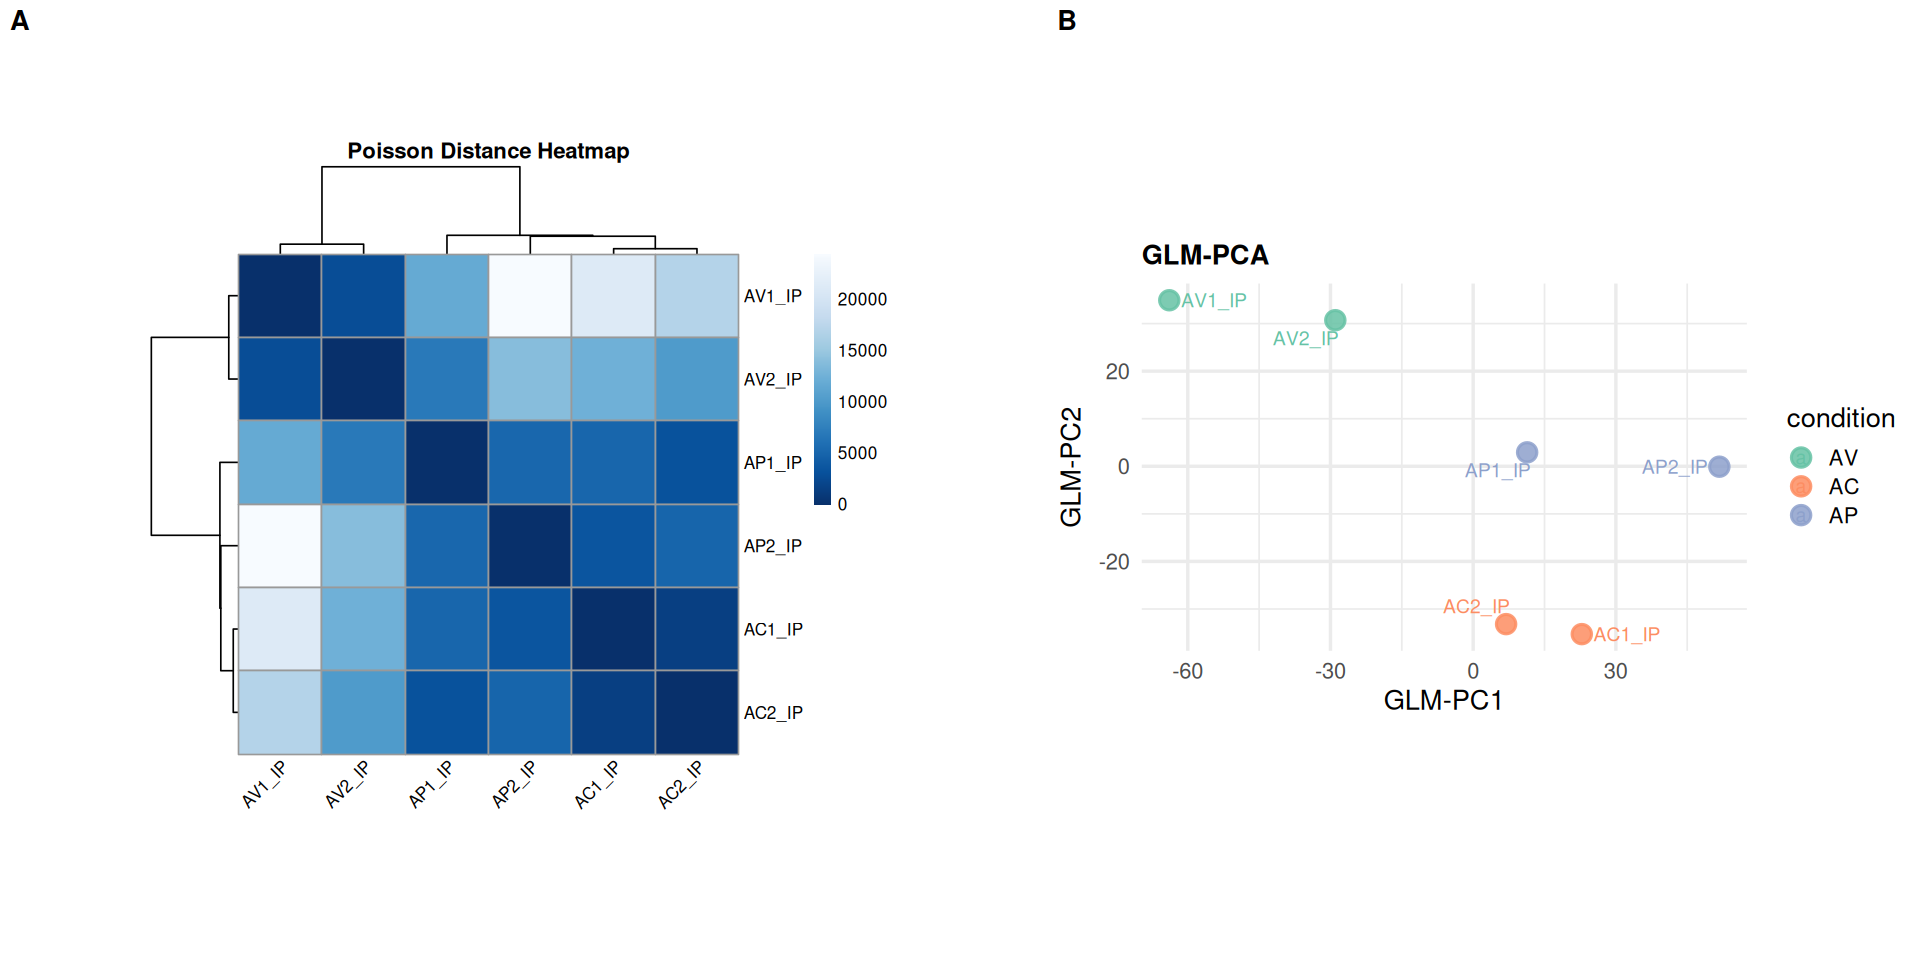

In [39]:
print("PCA by using GLMPCA library. RLOG and VSD transformations are more suitable than scale().")

# === GLM-PCA plot ===
gpca <- glmpca(assay(dds), L = 2)
gpca.dat <- gpca$factors
gpca.dat$sample <- colnames(dds)
gpca.dat$condition <- colData(dds)$condition

p_gpca <- ggplot(gpca.dat, aes(x = dim1, y = dim2, color = condition)) +
  geom_point(size = 4.5, alpha = 0.85, stroke = 1) +
  geom_text_repel(aes(label = sample), size = 4, box.padding = 0.4, max.overlaps = 8) +
  coord_fixed() +
  theme_minimal(base_size = 16) +
  labs(title = "GLM-PCA", x = "GLM-PC1", y = "GLM-PC2") +
  scale_color_brewer(palette = "Set2") +
  theme(
    legend.position = "right",
    plot.title = element_text(face = "bold", size = 16)
  )

# === Poisson distance heatmap ===
poisd <- PoissonDistance(t(counts(dds)))
samplePoisDistMatrix <- as.matrix(poisd$dd)

sample_names <- colnames(dds)
rownames(samplePoisDistMatrix) <- sample_names
colnames(samplePoisDistMatrix) <- sample_names

colors <- colorRampPalette(rev(brewer.pal(9, "Blues")))(255)

pheat <- pheatmap(samplePoisDistMatrix,
                  clustering_distance_rows = poisd$dd,
                  clustering_distance_cols = poisd$dd,
                  col = colors,
                  fontsize_row = 10,
                  fontsize_col = 10,
                  cellwidth = 50,
                  cellheight = 50,
                  angle_col = 45,
                  main = "Poisson Distance Heatmap",
                  silent = TRUE)

# Convert to grob for use with cowplot
g_poisson <- ggdraw(grobTree(pheat$gtable)) + theme(plot.margin = margin(5, 5, 5, 5))

# Set display size
options(repr.plot.width = 16, repr.plot.height = 8)

# Combine plots with cleaner spacing
combined_plot <- plot_grid(
  g_poisson, p_gpca,
  labels = c("A", "B"),
  label_size = 16,
  nrow = 1,
  rel_widths = c(1.2, 1)
)

# Print
print(combined_plot)


In [40]:
print("Performing Surrogate Variable Analysis")
print("SVA analysis")
# SV1, SV2, ... are surrogate variables — latent (hidden) factors estimated from the data that capture unwanted variation 
# (like batch effects, technical noise, or hidden biological subtypes).
# You can think of them as "virtual covariates" — constructed purely from the structure of your data — 
# that explain sources of variation not included in your model (like treatment or condition).
table(dds$condition)


[1] "Performing Surrogate Variable Analysis"
[1] "SVA analysis"



AV AC AP 
 2  2  2 

In [41]:
# === Step 1: Normalize counts and filter low-expressed genes ===
dds <- estimateSizeFactors(dds)  # Ensure normalization is computed
dat <- counts(dds, normalized = TRUE)

# Filter genes with low expression
idx <- rowMeans(dat) > 1
dat <- dat[idx, ]

# === Step 2: Check and prepare condition variable ===
# Make sure condition exists and is a factor
if (!"condition" %in% colnames(colData(dds))) {
  stop("The 'condition' column does not exist in colData(dds).")
}
dds$condition <- factor(dds$condition)
print(table(dds$condition))  # See how many samples per condition

# === Step 3: Construct model matrices ===
# mod  <- model.matrix(~ condition, data = colData(dds))
# mod0 <- model.matrix(~ 1, data = colData(dds))  # Null model (intercept only)

# Set up a full-rank design without an intercept
mod <- model.matrix(~ 0 + condition, data = colData(dds))
colnames(mod) <- levels(dds$condition)  # clean column names

# Null model (intercept only)
mod0 <- matrix(1, nrow = nrow(mod), ncol = 1)

# Sanity check: is mod full rank?
if (qr(mod)$rank != ncol(mod)) {
  stop("Design matrix 'mod' is not full rank. Check for redundant or missing conditions.")
}

# === Step 4: Run SVA ===
svseq <- sva(dat, mod, mod0, n.sv = 2)

# Check surrogate variables
head(svseq$sv, 2)

# === Step 5: Plot surrogate variables by condition ===
par(
  mfrow = c(1, 2),
  mar = c(5, 5, 4, 2) + 0.1,
  cex.main = 1.4,
  cex.axis = 1.1,
  cex.lab = 1.2,
  las = 1
)

for (i in 1:2) {
  stripchart(
    svseq$sv[, i] ~ dds$condition,
    vertical = TRUE,
    method = "jitter",
    pch = 21,
    bg = "steelblue",
    col = "black",
    frame.plot = FALSE,
    ylim = c(-0.8, 0.8),
    main = paste0("Surrogate Variable SV", i),
    ylab = "Surrogate Variable Value",
    xlab = "Condition",
    cex = 1.3
  )
  abline(h = 0, lty = 2, col = "gray50", lwd = 1.5)
}



AV AC AP 
 2  2  2 
Number of significant surrogate variables is:  2 
Iteration (out of 5 ):1  

ERROR: Error in solve.default(t(mod) %*% mod): Lapack routine dgesv: system is exactly singular: U[5,5] = 0


In [ ]:
# Finally, in order to use SVA to remove any effect on the counts from our surrogate variables, we simply add these two surrogate variables 
# as columns to the DESeqDataSet and then add them to the design:

ddssva <- dds
ddssva$SV1 <- svseq$sv[,1]
ddssva$SV2 <- svseq$sv[,2]
design(ddssva) <- ~ SV1 + SV2 + condition
  
ddssva$SV1
ddssva$SV2

# length(ddssva$SV1)
# length(ddssva$SV2)

ddssva <- DESeq(ddssva)
resultsNames(ddssva)

# rowRanges(ddssva)
# colData(ddssva)
# assays(ddssva)
# assay(ddssva)
# length(rowRanges(ddssva))

res_ddssva <- results(ddssva)
resultsNames(res_ddssva)

# Get results for different comparisons
res_ddssva_AP_vs_AC <- results(ddssva, contrast = c("condition", "AP", "AC"))
res_ddssva_AP_vs_AV <- results(ddssva, contrast = c("condition", "AP", "AV"))
res_ddssva_AC_vs_AV <- results(ddssva, contrast = c("condition", "AC", "AV"))

# summary(res_ddssva_AP_vs_AV)
# summary(res_ddssva_AC_vs_AV)
# summary(res_ddssva_AP_vs_AC)

# Save results
write.csv(as.data.frame(res_ddssva_AP_vs_AC), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AC_results.sva.csv")
write.csv(as.data.frame(res_ddssva_AP_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AV_results.sva.csv")
write.csv(as.data.frame(res_ddssva_AC_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AC_vs_AV_results.sva.csv")

###########################################################
###########################################################

print("number of differentially bound and expressed transcripts : AP vs AC : pvalue < 0.05, and padj < 0.1")
dim(subset(res_ddssva_AP_vs_AC, pvalue < 0.05))
dim(subset(res_ddssva_AP_vs_AC, padj < 0.1))

print("number of differentially bound and expressed transcripts : AP vs AV : pvalue < 0.05, and padj < 0.1")
dim(subset(res_ddssva_AP_vs_AV, pvalue < 0.05))
dim(subset(res_ddssva_AP_vs_AV, padj < 0.1))

print("number of differentially bound and expressed transcripts : AC vs AV : pvalue < 0.05, and padj < 0.1")
dim(subset(res_ddssva_AC_vs_AV, pvalue < 0.05))
dim(subset(res_ddssva_AC_vs_AV, padj < 0.1))

In [ ]:
# Transform count data
vsd2 <- vst(ddssva, blind = TRUE)
rld2 <- rlog(ddssva, blind = TRUE)

# Get PCA data
pca_vsd <- plotPCA(vsd2, intgroup = "condition", returnData = TRUE)
pca_rld <- plotPCA(rld2, intgroup = "condition", returnData = TRUE)

# Variance explained
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

# PCA plot for VST
p1 <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after SVA (VST)",
    x = paste0("PC1 (", percentVar_vsd[1], "%)"),
    y = paste0("PC2 (", percentVar_vsd[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# PCA plot for RLOG
p2 <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after SVA (RLOG)",
    x = paste0("PC1 (", percentVar_rld[1], "%)"),
    y = paste0("PC2 (", percentVar_rld[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# Show both plots side by side with legends
options(repr.plot.width = 14, repr.plot.height = 6)
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2)

In [ ]:
print("RUVseq analysis")

In [ ]:
library(RUVSeq)
library(DESeq2)

# Create SeqExpressionSet from DESeq2 object
set <- newSeqExpressionSet(counts(dds))

# Keep genes with sufficient expression
idx  <- rowSums(counts(set) > 5) >= 2
set  <- set[idx, ]

# Normalize
set <- betweenLaneNormalization(set, which = "upper")

# Run DESeq2 just to get raw p-values for empirical control genes
dds_temp <- dds[idx, ]
dds_temp <- DESeq(dds_temp)
res_temp <- results(dds_temp)

# Define empirical control genes as those with high p-value (non-DE)
not.sig <- rownames(res_temp)[which(res_temp$pvalue > 0.1)]
empirical <- rownames(set)[rownames(set) %in% not.sig]

# Apply RUVg with k=2 unwanted factors
set <- RUVg(set, empirical, k = 2)

# Add unwanted factors to DESeq2 design
ddsruv <- dds[idx, ]  # use filtered genes
ddsruv$W1 <- set$W_1
ddsruv$W2 <- set$W_2
design(ddsruv) <- ~ W1 + W2 + condition

# Run DESeq2 with adjusted design
ddsruv <- DESeq(ddsruv)

# Check model variables
resultsNames(ddsruv)

# Get results for different comparisons
res_ddsruv_AP_vs_AC <- results(ddsruv, contrast = c("condition", "AP", "AC"))
res_ddsruv_AP_vs_AV <- results(ddsruv, contrast = c("condition", "AP", "AV"))
res_ddsruv_AC_vs_AV <- results(ddsruv, contrast = c("condition", "AC", "AV"))

# Save results
write.csv(as.data.frame(res_ddsruv_AP_vs_AC), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AC_results.ruv.csv")
write.csv(as.data.frame(res_ddsruv_AP_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AP_vs_AV_results.ruv.csv")
write.csv(as.data.frame(res_ddsruv_AC_vs_AV), file = "A549.peaks.IP.samples.DESeq2_AC_vs_AV_results.ruv.csv")

# Summary statistics
print("number of differentially bound and expressed transcripts : AP vs AC : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_AP_vs_AC, pvalue < 0.05)))
print(dim(subset(res_ddsruv_AP_vs_AC, padj < 0.1)))

print("number of differentially bound and expressed transcripts : AP vs AV : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_AP_vs_AV, pvalue < 0.05)))
print(dim(subset(res_ddsruv_AP_vs_AV, padj < 0.1)))

print("number of differentially bound and expressed transcripts : AC vs AV : pvalue < 0.05, and padj < 0.1")
print(dim(subset(res_ddsruv_AC_vs_AV, pvalue < 0.05)))
print(dim(subset(res_ddsruv_AC_vs_AV, padj < 0.1)))


In [ ]:
# Set layout to 1 row, 2 columns (side by side)
par(
  mfrow = c(1, 2),
  mar = c(4, 4, 3, 1),   # margins: bottom, left, top, right
  cex.main = 1.2,        # title size
  cex.axis = 1.0,        # axis tick label size
  cex.lab = 1.1,         # axis title size
  las = 1                # horizontal y-axis labels
)

# Loop over W1 and W2
for (i in 1:2) {
  stripchart(
    pData(set)[, i] ~ dds$condition,
    vertical = TRUE,
    method = "jitter",
    pch = 21,
    bg = "steelblue",
    col = "black",
    frame.plot = FALSE,
    main = paste("W", i),
    ylab = "Factor Value",
    xlab = "Condition",
    cex = 1.1
  )
  abline(h = 0, lty = 2, col = "gray60", lwd = 1)
}


In [ ]:
# Transform count data from ddsruv
vsd3 <- vst(ddsruv, blind = TRUE)
rld3 <- rlog(ddsruv, blind = TRUE)

# Get PCA data
pca_vsd <- plotPCA(vsd3, intgroup = "condition", returnData = TRUE)
pca_rld <- plotPCA(rld3, intgroup = "condition", returnData = TRUE)

# Variance explained
percentVar_vsd <- round(100 * attr(pca_vsd, "percentVar"))
percentVar_rld <- round(100 * attr(pca_rld, "percentVar"))

# PCA plot for VST
p1 <- ggplot(pca_vsd, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after RUV (VST)",
    x = paste0("PC1 (", percentVar_vsd[1], "%)"),
    y = paste0("PC2 (", percentVar_vsd[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# PCA plot for RLOG
p2 <- ggplot(pca_rld, aes(PC1, PC2, color = condition)) +
  geom_point(size = 3, alpha = 0.8) +
  labs(
    title = "PCA after RUV (RLOG)",
    x = paste0("PC1 (", percentVar_rld[1], "%)"),
    y = paste0("PC2 (", percentVar_rld[2], "%)")
  ) +
  theme_minimal(base_size = 14) +
  scale_color_brewer(palette = "Set2") +
  theme(legend.position = "right")

# Show both plots side by side with legends
options(repr.plot.width = 14, repr.plot.height = 6)
plot_grid(p1, p2, labels = c("A", "B"), ncol = 2)

In [ ]:
library(EnhancedVolcano)

# Color	Label in legend	Meaning
# Grey	NS	Not Significant – the gene did not pass the p-value or log₂FC thresholds
# Green	Log₂ FC	The gene passed the log₂ fold change cutoff but not the p-value cutoff
# Blue	p-value	The gene passed the p-value cutoff but not the log₂FC cutoff
# Red	p value and log₂ FC	The gene passed both p-value and log₂FC thresholds — most interesting hits

# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5

# Set up the plotting window size for a more compact layout
options(repr.plot.width = 10, repr.plot.height = 8)

EnhancedVolcano(res_AP_vs_AC,
                lab = rownames(res_AP_vs_AC),
                x = 'log2FoldChange',
                y = 'pvalue',
                pCutoff = pval_cutoff,
                FCcutoff = lfc_cutoff,
                title = 'AP vs AC',
                pointSize = 2.0,
                labSize = 3.0,
                legendPosition = 'right',
                legendLabSize = 10,
                legendIconSize = 3.0,
                drawConnectors = TRUE,
                widthConnectors = 0.5,
                boxedLabels = FALSE)


In [ ]:
library(clusterProfiler)
library(org.Hs.eg.db) 
library(GO.db)         
library(DO.db)         
library(KEGGREST)      
library(ReactomePA)    
library(enrichplot)    
library(dplyr)
library(msigdbr)
library(msigdb)
library(msigdf)
library(msigdbdf)

In [ ]:
# Define thresholds
pval_cutoff <- 0.05
lfc_cutoff <- 0.5
fin_name = "A549.transcripts.nonip.RNA.samples"

In [ ]:
res <- res_AP_vs_AC  

head(res,3)
dim(res)

In [ ]:
# Filter out NA values
pvals <- res$pvalue[!is.na(res$pvalue)]
padj_vals <- res$padj[!is.na(res$padj)]

# Set layout: 1 row, 2 columns
par(mfrow = c(1, 2),            # 1 row, 2 columns
    mar = c(5, 5, 4, 2) + 0.1)  # margins: bottom, left, top, right

# Plot density of raw p-values
plot(density(pvals),
     main = "Density of raw p-values",
     xlab = "p-value",
     lwd = 2,
     col = "darkgreen")

# Plot density of adjusted p-values
plot(density(padj_vals),
     main = "Density of adjusted p-values",
     xlab = "adjusted p-value",
     lwd = 2,
     col = "tomato")

In [ ]:
# Step 1: Convert rownames to a column
res_sig <- as.data.frame(res) %>%
  rownames_to_column("gene") %>%
  filter(padj < pval_cutoff & abs(log2FoldChange) > lfc_cutoff)

# Step 2: Map SYMBOL to ENTREZID
gene_ids <- bitr(
  res_sig$gene,
  fromType = "SYMBOL",
  toType   = "ENTREZID",
  OrgDb    = org.Hs.eg.db
)

# Step 3: Merge back into results
res_merge <- merge(res_sig, gene_ids, by.x = "gene", by.y = "SYMBOL")
res_merge <- res_merge[!duplicated(res_merge$ENTREZID), ]

# Step 4: Prepare gene list for GSEA
gene_list2 <- setNames(res_merge$log2FoldChange, res_merge$ENTREZID)
gene_list2 <- sort(gene_list2, decreasing = TRUE)

# Step 5: Check
head(gene_list2, 3)
length(gene_list2)

In [ ]:
library(clusterProfiler)
library(org.Hs.eg.db)
library(cowplot)

# Predefine result objects to avoid "not found" error
result <- NULL
result2 <- NULL

# GO Over-Representation Analysis (ORA)
result <- tryCatch({
  ego <- enrichGO(gene          = gene_ids$ENTREZID,
                  OrgDb         = org.Hs.eg.db,
                  ont           = "BP",
                  keyType       = "ENTREZID",  
                  pAdjustMethod = "BH",
                  pvalueCutoff  = 0.05,
                  qvalueCutoff  = 1,
                  readable      = TRUE)
  
  # Save results
  write.table(ego@result, file = paste0(fin_name, "_GO_OverRepresentation_Results.txt"), 
              row.names = FALSE, col.names = TRUE, quote = FALSE)

  # Save PNG
  png(paste0(fin_name, "_GO_OverRepresentation.png"), width = 1000, height = 800)
  print(dotplot(ego, showCategory = 20, title = "GO ORA (BP)"))
  dev.off()

  # Return ggplot object
  dotplot(ego, showCategory = 20, title = "GO ORA (BP)")

}, error = function(e) {
  cat("Error in GO ORA:", conditionMessage(e), "\n")
  NULL
})


# GO Enrichment Analysis (GSEA)
result2 <- tryCatch({
  ego2 <- gseGO(gene          = gene_list2,
                OrgDb         = org.Hs.eg.db,
                keyType       = "ENTREZID",  
                ont           = "BP",
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05)

  if (nrow(ego2@result) > 0) {
    write.table(ego2@result, file = paste0(fin_name, "_GO_Enrichment_Results.txt"), 
                row.names = FALSE, col.names = TRUE, quote = FALSE)

    png(paste0(fin_name, "_GO_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(ego2, showCategory = 20, title = "GO GSEA (BP)"))
    dev.off()

    dotplot(ego2, showCategory = 20, title = "GO GSEA (BP)")
  } else {
    cat("No enriched terms in GSEA under pvalueCutoff.\n")
    NULL
  }

}, error = function(e) {
  cat("Error in GO GSEA:", conditionMessage(e), "\n")
  NULL
})

# === Display plots side by side if both exist ===
options(repr.plot.width = 16, repr.plot.height = 8)

if (!is.null(result) && !is.null(result2)) {
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))
} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)
} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)
} else {
  cat("No enrichment plots to display.\n")
}


In [ ]:
# === KEGG Over-Representation Analysis (ORA) ===
result <- tryCatch({

  kegg_enrich <- enrichKEGG(
    gene           = gene_ids$ENTREZID,
    organism       = "hsa",
    pAdjustMethod  = "BH",
    pvalueCutoff   = 0.05
  )

  if (!is.null(kegg_enrich) && nrow(kegg_enrich@result) > 0) {

    # Save results
    write.table(kegg_enrich@result,
                file = paste0(fin_name, "_KEGG_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save PNG plot
    png(paste0(fin_name, "_KEGG_OverRepresentation_Plot.png"), width = 1000, height = 800)
    print(dotplot(kegg_enrich, showCategory = 20, title = "KEGG ORA"))
    dev.off()

    # Return plot object
    return(dotplot(kegg_enrich, showCategory = 20, title = "KEGG ORA"))

  } else {
    cat("⚠️ No enriched KEGG terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in KEGG ORA:", conditionMessage(e), "\n")
  return(NULL)
})



# === KEGG Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  kegg_gse <- gseKEGG(
    geneList      = gene_list2,
    organism      = "hsa",
    minGSSize     = 120,
    pvalueCutoff  = 0.05,
    verbose       = FALSE
  )

  if (!is.null(kegg_gse) && nrow(kegg_gse@result) > 0) {

    # Save results
    write.table(kegg_gse@result,
                file = paste0(fin_name, "_KEGG_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save PNG plot
    png(paste0(fin_name, "_KEGG_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(kegg_gse, showCategory = 20, title = "KEGG GSEA"))
    dev.off()

    # Return plot object
    return(dotplot(kegg_gse, showCategory = 20, title = "KEGG GSEA"))

  } else {
    cat("⚠️ No enriched KEGG terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in KEGG GSEA:", conditionMessage(e), "\n")
  return(NULL)
})



# === Display Plots Nicely ===
# Set default figure size
options(repr.plot.width = 6, repr.plot.height = 6)

if (!is.null(result) && !is.null(result2)) {
  # Side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No KEGG enrichment plots to display.\n")
}


In [ ]:
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(pathview)         # Optional for WikiPathways
library(dplyr)
library(DOSE)
library(rWikiPathways)

# === WikiPathways Over-Representation Analysis (ORA) ===
result <- tryCatch({

  wikipathways_enrich <- enrichWP(
    gene           = gene_ids$ENTREZID,
    organism       = "Homo sapiens",
    pvalueCutoff   = 0.05
  )

  if (!is.null(wikipathways_enrich) && nrow(wikipathways_enrich@result) > 0) {

    # Save results
    write.table(wikipathways_enrich@result,
                file = paste0(fin_name, "_WikiPathways_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save plot
    png(paste0(fin_name, "_WikiPathways_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_enrich, showCategory = 20, title = "WikiPathways ORA"))
    dev.off()

    # Return plot object
    return(dotplot(wikipathways_enrich, showCategory = 20, title = "WikiPathways ORA"))

  } else {
    cat("⚠️ No enriched WikiPathways terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in WikiPathways ORA:", conditionMessage(e), "\n")
  return(NULL)
})



# === WikiPathways Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  wikipathways_gse <- gseWP(
    gene          = gene_list2,
    organism      = "Homo sapiens",
    pvalueCutoff  = 0.05
  )

  if (!is.null(wikipathways_gse) && nrow(wikipathways_gse@result) > 0) {

    # Save results
    write.table(wikipathways_gse@result,
                file = paste0(fin_name, "_WikiPathways_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save plot
    png(paste0(fin_name, "_WikiPathways_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(wikipathways_gse, showCategory = 20, title = "WikiPathways GSEA"))
    dev.off()

    # Return plot object
    return(dotplot(wikipathways_gse, showCategory = 20, title = "WikiPathways GSEA"))

  } else {
    cat("⚠️ No enriched WikiPathways terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in WikiPathways GSEA:", conditionMessage(e), "\n")
  return(NULL)
})



# === Display plots ===
options(repr.plot.width = 5, repr.plot.height = 5)  # Default size

if (!is.null(result) && !is.null(result2)) {
  # Show both plots side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No WikiPathways enrichment plots to display.\n")
}


In [ ]:
library(ReactomePA)
library(clusterProfiler)
library(enrichplot)
library(cowplot)

# === Reactome Over-Representation Analysis (ORA) ===
result <- tryCatch({

  reactome_ora <- enrichPathway(
    gene           = gene_ids$ENTREZID,
    organism       = "human",
    pAdjustMethod  = "BH",
    pvalueCutoff   = 0.05
  )

  if (!is.null(reactome_ora) && nrow(reactome_ora@result) > 0) {

    # Save results
    write.table(reactome_ora@result,
                file = paste0(fin_name, "_Reactome_ORA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save plot
    png(paste0(fin_name, "_Reactome_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_ora, showCategory = 20, title = "Reactome ORA"))
    dev.off()

    # Return plot for screen
    return(dotplot(reactome_ora, showCategory = 20, title = "Reactome ORA"))

  } else {
    cat("⚠️ No enriched Reactome terms found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in Reactome ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Reactome GSEA Analysis ===
result2 <- tryCatch({

  reactome_gsea <- gsePathway(
    gene            = gene_list2,
    organism        = "human",
    pAdjustMethod   = "BH",
    pvalueCutoff    = 0.05
  )

  if (!is.null(reactome_gsea) && nrow(reactome_gsea@result) > 0) {

    # Save results
    write.table(reactome_gsea@result,
                file = paste0(fin_name, "_Reactome_Enrichment_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    # Save plot
    png(paste0(fin_name, "_Reactome_Enrichment_Plot.png"), width = 1000, height = 800)
    print(dotplot(reactome_gsea, showCategory = 20, title = "Reactome GSEA"))
    dev.off()

    # Return plot for screen
    return(dotplot(reactome_gsea, showCategory = 20, title = "Reactome GSEA"))

  } else {
    cat("⚠️ No enriched Reactome terms found in GSEA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in Reactome GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 6, repr.plot.height = 6)

if (!is.null(result) && !is.null(result2)) {
  # Show both side-by-side
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No Reactome enrichment plots to display.\n")
}


In [ ]:
library(msigdbr)
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(dplyr)

# === Prepare MSigDB C2 gene sets ===
msig_genesets <- msigdbr(species = "Homo sapiens", category = "C2")
C2_t2g <- msig_genesets %>% dplyr::select(gs_name, entrez_gene)

# Use gene_ids$ENTREZID for ORA, and named gene_list2 for GSEA
gene_list <- gene_ids$ENTREZID  # for ORA

# === MSigDB Over-Representation Analysis (ORA) ===
result <- tryCatch({

  msig_enrich <- enricher(
    gene       = gene_list,
    TERM2GENE  = C2_t2g
  )

  if (!is.null(msig_enrich) && nrow(msig_enrich@result) > 0) {

    write.table(msig_enrich@result,
                file = paste0(fin_name, "_MSigDB_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))
    dev.off()

    return(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))

  } else {
    cat("⚠️ No significant MSigDB pathways found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === MSigDB Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  msig_gsea <- GSEA(
    geneList   = gene_list2,
    TERM2GENE  = C2_t2g,
    pvalueCutoff = 0.05
  )

  if (!is.null(msig_gsea) && nrow(msig_gsea@result) > 0) {

    write.table(msig_gsea@result,
                file = paste0(fin_name, "_MSigDB_GSEA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_GSEA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))
    dev.off()

    return(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))

  } else {
    cat("⚠️ No significant MSigDB GSEA pathways found.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 20, repr.plot.height = 20)

if (!is.null(result) && !is.null(result2)) {
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No MSigDB enrichment plots to display.\n")
}


In [ ]:
library(msigdbr)
library(clusterProfiler)
library(enrichplot)
library(cowplot)
library(dplyr)

# === Prepare MSigDB C2 gene sets ===
msig_genesets <- msigdbr(species = "Homo sapiens", category = "C5")
C2_t2g <- msig_genesets %>% dplyr::select(gs_name, entrez_gene)

# Use gene_ids$ENTREZID for ORA, and named gene_list2 for GSEA
gene_list <- gene_ids$ENTREZID  # for ORA

# === MSigDB Over-Representation Analysis (ORA) ===
result <- tryCatch({

  msig_enrich <- enricher(
    gene       = gene_list,
    TERM2GENE  = C2_t2g
  )

  if (!is.null(msig_enrich) && nrow(msig_enrich@result) > 0) {

    write.table(msig_enrich@result,
                file = paste0(fin_name, "_MSigDB_OverRepresentation_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_ORA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))
    dev.off()

    return(dotplot(msig_enrich, showCategory = 20, title = "MSigDB ORA"))

  } else {
    cat("⚠️ No significant MSigDB pathways found in ORA.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB ORA:", conditionMessage(e), "\n")
  return(NULL)
})


# === MSigDB Gene Set Enrichment Analysis (GSEA) ===
result2 <- tryCatch({

  msig_gsea <- GSEA(
    geneList   = gene_list2,
    TERM2GENE  = C2_t2g,
    pvalueCutoff = 0.05
  )

  if (!is.null(msig_gsea) && nrow(msig_gsea@result) > 0) {

    write.table(msig_gsea@result,
                file = paste0(fin_name, "_MSigDB_GSEA_Results.txt"),
                sep = "\t", row.names = FALSE, quote = FALSE)

    png(paste0(fin_name, "_MSigDB_GSEA_Plot.png"), width = 1000, height = 800)
    print(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))
    dev.off()

    return(dotplot(msig_gsea, showCategory = 20, title = "MSigDB GSEA"))

  } else {
    cat("⚠️ No significant MSigDB GSEA pathways found.\n")
    return(NULL)
  }

}, error = function(e) {
  cat("❌ Error in MSigDB GSEA:", conditionMessage(e), "\n")
  return(NULL)
})


# === Display plots ===
options(repr.plot.width = 10, repr.plot.height = 10)

if (!is.null(result) && !is.null(result2)) {
  options(repr.plot.width = 12, repr.plot.height = 6)
  plot_grid(result, result2, labels = c("A", "B"), ncol = 2, rel_widths = c(1, 1))

} else if (!is.null(result)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result)

} else if (!is.null(result2)) {
  options(repr.plot.width = 7, repr.plot.height = 6)
  print(result2)

} else {
  cat("⚠️ No MSigDB enrichment plots to display.\n")
}
